In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
cd /content/gdrive/'My Drive'/'Colab Notebooks'/'COVID 19 (3715) Final Project'/

/content/gdrive/My Drive/Colab Notebooks/COVID 19 (3715) Final Project


In [5]:
ls

'CIS 3715 Week III (COVID 19).ipynb'          covid_deaths_usafacts.csv
'Covid-19 Admin Console - Central Data.csv'   daily.csv
 covid_confirmed_usafacts.csv                 us-counties.csv
 covid_county_population_usafacts.csv


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**First we will take a look at these datasets to gain a better understanding of them**



In [ ]:
central_data = pd.read_csv("./Covid-19 Admin Console - Central Data.csv")
confirmed = pd.read_csv("./covid_confirmed_usafacts.csv")
deaths = pd.read_csv("./covid_deaths_usafacts.csv")
county_pop = pd.read_csv("./covid_county_population_usafacts.csv")
daily = pd.read_csv("./daily.csv")
us_counties = pd.read_csv("./us-counties.csv")

In [8]:
df_list = [central_data, confirmed, deaths, county_pop, daily, us_counties]
df_names = ["central data", "confirmed", "deaths", "county population", "daily", "us_counties"]

for i in range(len(df_list)):
  print(df_names[i])
  print("Num rows: {}".format(df_list[i].shape[0]))
  print("Num cols: {}".format(df_list[i].shape[1]))  
  print(df_list[i].columns)
  print("-" * 20)

central data
Num rows: 2975
Num cols: 9
Index(['State', 'County', 'Date', 'Raw Description', 'Information type',
       'Mitigation type', 'Note', 'UserID', 'Source'],
      dtype='object')
--------------------
confirmed
Num rows: 3195
Num cols: 97
Index(['countyFIPS', 'County Name', 'State', 'stateFIPS', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',

In [9]:
daily.head()

date state  ...  positiveIncrease  totalTestResultsIncrease
0  20200424    AK  ...               2.0                     120.0
1  20200424    AL  ...              54.0                      54.0
2  20200424    AR  ...             276.0                    3988.0
3  20200424    AS  ...               0.0                       0.0
4  20200424    AZ  ...             276.0                    2017.0

[5 rows x 25 columns]

In [10]:
confirmed.head()

countyFIPS            County Name State  ...  4/21/20  4/22/20  4/23/20
0           0  Statewide Unallocated    AL  ...        0        0        0
1        1001         Autauga County    AL  ...       30       32       33
2        1003         Baldwin County    AL  ...      123      132      143
3        1005         Barbour County    AL  ...       28       29       30
4        1007            Bibb County    AL  ...       32       33       33

[5 rows x 97 columns]

For datasets that are originated from USAFACTS source, their indices are counties and their columns are dates (starting from 01/22 to 04/23). These datasets are deaths and confirmed. 

These 2 datasets tracks the number of accumulative deaths and confirmed cases on a county level.

The deaths dataset is worth keeping but what about the confirmed dataset? The reason this question is asked because I also have another dataset relating to confirmed cases (it is called daily.csv) in which it shows more details about confirmed cases like how many are in ICU, tests positives and stuff like that but only on states-level and it is kind of sparse so for some columns, it lacks data. 

**So in summary:**

daily - good because it has totalTestResults, hospitalized columns that are unique to this dataset.

deaths - good because it has deaths on a county level (USAFacts)

confirmed - good because it has the number of cases on a county level (USAFacts)

county_pop - good because it has the county's population (USAFacts)

us_counties - good because it contains both deaths and confirmed cases on a county level and it is curated by the NY time. 

It might be easier to just keep daily, us_counties and county_pop and get rid of deaths and confirmed because:

a) us_counties cover data that are in both deaths and confirmed on a county level as well. Its index is already in date whereas deaths and confirmed has dates as columns. This is an extra steps of transpose. 

b) keep daily because it has a lot more details for confirmed cases and other additional information on which data analysis can be done. 

In [11]:
daily.head()

date state  ...  positiveIncrease  totalTestResultsIncrease
0  20200424    AK  ...               2.0                     120.0
1  20200424    AL  ...              54.0                      54.0
2  20200424    AR  ...             276.0                    3988.0
3  20200424    AS  ...               0.0                       0.0
4  20200424    AZ  ...             276.0                    2017.0

[5 rows x 25 columns]

In [12]:
# checking start and end date for central_data
central_data.head()

State County  ...      UserID                                             Source
0   USA    NaN  ...        am50  https://www.cdc.gov/media/releases/2020/p0117-...
1   USA    NaN  ...  az17, BR30                   https://www.nga.org/coronavirus/
2   USA    NaN  ...        BR30  https://www.nbcnews.com/health/health-news/cor...
3   USA    NaN  ...  az17, BR30                   https://www.nga.org/coronavirus/
4   USA    NaN  ...  az17, BR30                   https://www.nga.org/coronavirus/

[5 rows x 9 columns]

In [13]:
central_data.tail()

State County  ... UserID                                             Source
2970  Wyoming    NaN  ...   ME29                   https://www.nga.org/coronavirus/
2971  Wyoming    NaN  ...   OJ98  https://health.wyo.gov/targeted-use-of-persona...
2972  Wyoming    NaN  ...   OJ98  https://governor.wyo.gov/media/news-releases/2...
2973  Wyoming    NaN  ...   OJ98  https://health.wyo.gov/cdc-team-deployed-to-wy...
2974  Wyoming    NaN  ...   OJ98  https://governor.wyo.gov/media/news-releases/2...

[5 rows x 9 columns]

Central_data has start date from 01/17/2020 and end date of 4/15/2020. 

In [14]:
us_counties.head()

date     county       state     fips  cases  deaths
0  2020-01-21  Snohomish  Washington  53061.0      1       0
1  2020-01-22  Snohomish  Washington  53061.0      1       0
2  2020-01-23  Snohomish  Washington  53061.0      1       0
3  2020-01-24       Cook    Illinois  17031.0      1       0
4  2020-01-24  Snohomish  Washington  53061.0      1       0

In [15]:
us_counties.tail()

date      county    state     fips  cases  deaths
84138  2020-04-23    Sublette  Wyoming  56035.0      1       0
84139  2020-04-23  Sweetwater  Wyoming  56037.0     10       0
84140  2020-04-23       Teton  Wyoming  56039.0     63       1
84141  2020-04-23       Uinta  Wyoming  56041.0      6       0
84142  2020-04-23    Washakie  Wyoming  56043.0      4       0

Us_counties has a start date of 01/21 and an end date of 04/23.

In [16]:
daily.head()

date state  ...  positiveIncrease  totalTestResultsIncrease
0  20200424    AK  ...               2.0                     120.0
1  20200424    AL  ...              54.0                      54.0
2  20200424    AR  ...             276.0                    3988.0
3  20200424    AS  ...               0.0                       0.0
4  20200424    AZ  ...             276.0                    2017.0

[5 rows x 25 columns]

In [17]:
daily.tail()

date state  ...  positiveIncrease  totalTestResultsIncrease
2820  20200126    WA  ...               0.0                       0.0
2821  20200125    WA  ...               0.0                       0.0
2822  20200124    WA  ...               0.0                       0.0
2823  20200123    WA  ...               0.0                       0.0
2824  20200122    WA  ...               NaN                       NaN

[5 rows x 25 columns]

daily has a start date of 01/22 and an end date of 04/24. 

**Checking the unique types of mitigation responses**

In [18]:
central_data['Mitigation type'].value_counts()

other                                                                702
new public services                                                  376
non-essential closing                                                313
movement restriction                                                 238
school closing                                                       233
stay at home                                                         194
events cancelled                                                     188
public service reduction                                             150
state of emergency                                                   145
new public service                                                    60
wear masks                                                            48
work restriction                                                      42
Other                                                                 30
public services reduction                          

In [19]:
original_classes = ["events cancelled", "work restriction", "school closing", "non-essential closing", "new public services", "public service reduction", "movement restriction", "stay at home", "state of emergency", "wear masks", "other"]
len(original_classes)

11

The original classes seem to have some duplicates that is due to typos. We will correct this. 

In [20]:
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("Other","other")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("public services reduction","public service reduction")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("events canceled","events cancelled")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("schools closing","school closing")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("stay at home policy","stay at home")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("Stay at home","stay at home")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("work resistriction","work restriction")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("non-essential closings","non-essential closing")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("new public services\t","new public services")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("State of emergency","state of emergency")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("public service restriciton","public service reduction")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("event cancelled","events cancelled")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("work restiriction","work restriction")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("new public servie","new public servies")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("work restrictions","work restriction")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("movement restrictions","movement restriction")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("School Closing","school closing")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("work from home","stay at home")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("non-essential services closed","non-essential closings")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("wear a mask","wear masks")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("social distancing","movement restriction")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("movement resistriction","movement restriction")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("school closing, non-essential closing","school closing")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("school closings","school closing")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("school closing; non-essential closing","school closing")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("otherr","other")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("events cancellation","events cancelled")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("Public health emergency","state of emergency")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("Schools closed","school closing")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("pubilc service reduction","public service reduction")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("travel restriction","movement restriction")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("New public service","new public services")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("stay-at-home","stay at home")
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("new public servies","new public services")

# for those that we need exact match
central_data[central_data['Mitigation type'] == "essential closing"]['Mitigation type'].str.replace("essential closing","non-essential closing")
central_data[central_data['Mitigation type'] == "new public service"]['Mitigation type'].str.replace("new public service","new public services")

51      new public services
67      new public services
78      new public services
79      new public services
96      new public services
341     new public services
393     new public services
398     new public services
400     new public services
410     new public services
411     new public services
415     new public services
416     new public services
417     new public services
428     new public services
431     new public services
435     new public services
438     new public services
440     new public services
442     new public services
443     new public services
705     new public services
707     new public services
723     new public services
730     new public services
732     new public services
740     new public services
742     new public services
987     new public services
999     new public services
1000    new public services
1041    new public services
1042    new public services
1359    new public services
1367    new public services
1457    new public s

In [21]:
central_data['Mitigation type'].value_counts()

other                                                                733
new public services                                                  382
non-essential closing                                                316
school closing                                                       245
movement restriction                                                 243
stay at home                                                         202
events cancelled                                                     198
public service reduction                                             172
state of emergency                                                   148
new public service                                                    60
wear masks                                                            49
work restriction                                                      49
gathering restriction                                                  3
other buying limit                                 

It seems like there are some interesting classes that people put in. Let's explore these to see whether or not they can be kept or maybe turned into a singular class

In [22]:
central_data[central_data['Mitigation type'] == 'gathering restriction']['Raw Description']

226     Limit gatherings to less than 10 persons excep...
956     Des Moines Mayor Frank Cownie has declared a s...
2384    Governor Henry McMaster today issued Executive...
Name: Raw Description, dtype: object

In [23]:
central_data.iloc[226, :]['Raw Description']

'Limit gatherings to less than 10 persons except in unenclosed spaces where social distancing can be achieved, businesses, places of worship, governing bodies, judiciary, etc.'

In [24]:
central_data.iloc[956, :]['Raw Description']

'Des Moines Mayor Frank Cownie has declared a state of emergency, prohibiting gatherings of more than 250 people on public property.'

In [25]:
central_data.iloc[2384, :]['Raw Description']

'Governor Henry McMaster today issued Executive Order 2020-13 mandating that social distancing be practiced and law enforcement disperse public gatherings of 3 or more people.'

It looks like the raw description for thos that are classified as gathering restriction seem to relate most to the class of movement restriction.

Let's look for other rows in which the word gatherings appear in the Raw Description and see how the majority of them are classified. 

In [26]:
central_data[central_data['Raw Description'].str.contains('gatherings')]['Mitigation type'].value_counts()

movement restriction                     49
other                                    22
non-essential closing                    16
events cancelled                         15
stay at home                             11
school closing                            4
work restriction                          3
gathering restriction                     3
public service reduction                  2
state of emergency                        1
events cancelled/movement restriciton     1
new public services                       1
Name: Mitigation type, dtype: int64

It looks like the majority of the raw description that has the word gatherings in it are classified as movement restriction and that kind of confirmed how I would go about in classifying these 3 rows that are classified as gathering restrictions.

In [ ]:
central_data['Mitigation type'] = central_data['Mitigation type'].str.replace("gathering restriction","movement restriction")

In [28]:
central_data[central_data['Mitigation type'] == "essential closing"]['Mitigation type'].str.replace("essential closing","non-essential closing")

852    non-essential closing
865    non-essential closing
Name: Mitigation type, dtype: object

In [29]:
central_data.loc[852, :]

State                                                        Illinois
County                                                            NaN
Date                                                        3/16/2020
Raw Description     the launch of YouthCare services for DCFS yout...
Information type                                                other
Mitigation type                                     essential closing
Note                                                              NaN
UserID                                                           MT27
Source                        https://coronavirus.illinois.gov/s/news
Name: 852, dtype: object

In [30]:
central_data[central_data['Mitigation type'] == 'other buying limit']['Raw Description']

629    Publix starts to limit the number of certain i...
680    Seminole County issues a social-distancing man...
Name: Raw Description, dtype: object

In [31]:
central_data.iloc[629, :]['Raw Description']

'Publix starts to limit the number of certain items customers can purchase as some shoppers begin hoarding toilet paper and other essentials.'

In [32]:
central_data.iloc[680, :]['Raw Description']

'Seminole County issues a social-distancing mandate, which is not the same as a stay-at-home order'

There seems to be a misclassification for row 680 as the raw description has nothing to do with the class. I am going to re-classify it as movement-restriction and drop row 629.

In [ ]:
central_data.iloc[680, :]['Mitigation type'] = central_data.iloc[680, :]['Mitigation type'].replace("other buying limit","movement restriction")

In [ ]:
central_data.drop(629, inplace=True)

In [35]:
central_data[central_data['Mitigation type'] == 'events cancelled/movement restriciton']['Raw Description']

16    President Trump advised all Americans to avoid...
Name: Raw Description, dtype: object

In [36]:
central_data.loc[16, :]['Raw Description']

'President Trump advised all Americans to avoid gatherings of 10 or more people, to avoid going to bars and restaurants and to halt discretionary travel. The guidelines, from the administration’s coronavirus task force, will remain in effect for 15 days.'

This sounds a like a movement restriction class. 

In [ ]:
central_data.loc[16, :]['Mitigation type'] = central_data.loc[16, :]['Mitigation type'].replace('events cancelled/movement restriciton', 'movement restriction')

In [38]:
central_data[central_data['Mitigation type'] == 'new public services (?) other(?)']['Raw Description']

2177    Gov. DeWine names 6 facilities to potentially ...
Name: Raw Description, dtype: object

In [39]:
central_data.loc[2177, :]['Raw Description']

'Gov. DeWine names 6 facilities to potentially be named health facilities'

This sounds like new public services. 

In [40]:
central_data.loc[2177, :]['Mitigation type'] = central_data.loc[2177, :]['Mitigation type'].replace('new public services (?) other(?)','new public services')
central_data.loc[2177, :]['Mitigation type']

'new public services'

In [41]:
central_data[central_data['Mitigation type'] == 'state of emergency, movement restriction']['Raw Description']

1289    With gov’s state of emergency declaration, MA ...
Name: Raw Description, dtype: object

In [42]:
central_data.loc[1289, :]['Raw Description']

'With gov’s state of emergency declaration, MA adopts new coronavirus strategy'

This is obviously a state of emergency.

In [43]:
central_data.loc[1289, :]['Mitigation type'] = central_data.loc[1289, :]['Mitigation type'].replace('state of emergency, movement restriction','state of emergency')
central_data.loc[1289, :]['Mitigation type']

'state of emergency'

In [44]:
central_data[central_data['Mitigation type'] == 'public service reduction, non-essential closing']['Raw Description']

2802    Seattle Mayor Jenny Durkan said all library lo...
Name: Raw Description, dtype: object

In [45]:
central_data.loc[2802, :]['Raw Description']

'Seattle Mayor Jenny Durkan said all library locations and community centers would be closed starting March 14 until at least April 13'

This sounds like non-essential closing.

In [ ]:
central_data.loc[2802, :]['Mitigation type'] = 'non-essential closing'

In [47]:
central_data[central_data['Mitigation type'] == 'events cancelled, non-essential closing']['Raw Description']

1773    Sisolak announces more closures to stop corona...
Name: Raw Description, dtype: object

In [48]:
central_data.loc[1773, :]['Raw Description']

'Sisolak announces more closures to stop coronavirus spread in Nevada'

In [ ]:
central_data.loc[1773, :]['Mitigation type'] = central_data.loc[1773, :]['Mitigation type'].replace('events cancelled, non-essential closing','non-essential closing')

In [50]:
central_data[central_data['Mitigation type'] == 'public service reduction, state of emergency']['Raw Description']

65    county declares state of emergency as cases ri...
Name: Raw Description, dtype: object

In [51]:
central_data.loc[65, :]['Raw Description']

'county declares state of emergency as cases rise to 12. Birmingham city declares state of emergency, limit meetings of people to 25, using text service to distribute covid-19 information'

In [ ]:
central_data.loc[65, :]['Mitigation type'] = central_data.loc[65, :]['Mitigation type'].replace('public service reduction, state of emergency','state of emergency')

In [53]:
central_data[central_data['Mitigation type'] == 'public service reduction, events cancelled, non-essential closing']['Raw Description']

70    Governor Ivey, ADPH issue statewide health order
Name: Raw Description, dtype: object

In [54]:
central_data.loc[70, :]['Raw Description']

'Governor Ivey, ADPH issue statewide health order'

In [55]:
central_data.loc[70, :]['Source']

'https://www.wbrc.com/2020/03/19/governor-ivey-issues-statewide-health-order/'

From reading the above source, in her order, there were a lot of non-essential closings.

In [ ]:
central_data.loc[70, :]['Mitigation type'] = central_data.loc[70, :]['Mitigation type'].replace('public service reduction, events cancelled, non-essential closing','non-essential closing')

In [57]:
central_data[central_data['Mitigation type'] == 'Fundings']['Raw Description']

2703    On March 20, Governor Scott announced that he ...
Name: Raw Description, dtype: object

In [58]:
central_data.loc[2703, :]['Raw Description']

'On March 20, Governor Scott announced that he would be working with the VT state legislature to develop a loan program through the Vermont Economic Development Authority (VEDA) for businesses impacted economically by the pandemic'

We can drop row 2703 because this is not a mitigation type.

In [ ]:
central_data.drop(2703, inplace=True)

In [60]:
central_data[central_data['Mitigation type'] == 'financial aid']['Raw Description']

2329    If you are employed in Pennsylvania and are un...
Name: Raw Description, dtype: object

In [61]:
central_data.loc[2329, :]['Raw Description']

'If you are employed in Pennsylvania and are unable to work because of COVID-19, you may be eligible for Unemployment Compensation (UC) or Workers’ Compensation (WC) benefits.'

Similar case as row 2703.

In [ ]:
central_data.drop(2329, inplace=True)

In [63]:
central_data['Mitigation type'].value_counts()

other                       733
new public services         383
non-essential closing       319
movement restriction        248
school closing              245
stay at home                202
events cancelled            198
public service reduction    172
state of emergency          150
new public service           60
work restriction             49
wear masks                   49
essential closing             2
non-essential closings        1
Name: Mitigation type, dtype: int64

In [64]:
central_data[central_data['Mitigation type'] == 'essential closing']

State County  ... UserID                                   Source
852  Illinois    NaN  ...   MT27  https://coronavirus.illinois.gov/s/news
865  Illinois    NaN  ...   MT27  https://coronavirus.illinois.gov/s/news

[2 rows x 9 columns]

In [65]:
central_data[central_data['Mitigation type'] == 'non-essential closings']

State  ...                                             Source
2206  Oklahoma  ...  https://journalrecord.com/2020/04/01/covid-19-...

[1 rows x 9 columns]

In [66]:
central_data.loc[852, :]['Mitigation type'] = central_data.loc[852, :]['Mitigation type'].replace('essential closing','non-essential closing')
central_data.loc[865, :]['Mitigation type'] = central_data.loc[865, :]['Mitigation type'].replace('essential closing','non-essential closing')
central_data.loc[2206, :]['Mitigation type'] = central_data.loc[2206, :]['Mitigation type'].replace('non-essential closings','non-essential closing')
central_data['Mitigation type'].value_counts()

other                       733
new public services         383
non-essential closing       322
movement restriction        248
school closing              245
stay at home                202
events cancelled            198
public service reduction    172
state of emergency          150
new public service           60
work restriction             49
wear masks                   49
Name: Mitigation type, dtype: int64

It looks like we have finished cleaning up our mitigation type columns. 

Let's explore how many counties we got out of the entire dataset.

In [67]:
central_data['County'].value_counts()

Douglas                                31
New Orleans                            28
King                                   26
Houston                                21
Boston                                 20
                                       ..
Jackson                                 1
Shiawassee                              1
Pacific                                 1
Chicot, Howard, Lonoke and Randolph     1
Saline, Benton                          1
Name: County, Length: 332, dtype: int64

In [68]:
central_data[central_data['State'] != 'USA'].shape[0]

2927

It looks like out of only data that is collected for states, only 11% contains some sort of info on a county level.
Let's find the top 10 most popular county (but broken down by state level since states can have the same county names) and do analysis on them then we can do analysis on state levels then on country level.

In [69]:
counties_df = pd.DataFrame(central_data.groupby('State')['County'].value_counts())

# top 10 counties based on most mentioned in the dataset
top_10_counties = sorted(counties_df['County'], reverse=True)[:10]
print(top_10_counties)

[30, 28, 26, 21, 20, 19, 14, 14, 12, 12]


Since we have some duplicates in the number of mentions, we will get rid of them when we are looping through to print out the county names because a duplicate will just mean that the same counties will be printed out that many times. 

In [70]:
top_10_counties_list = []
for mentions in np.unique(top_10_counties):
  print(counties_df[counties_df["County"] == mentions])
  top_10_counties_list.append(list(counties_df[counties_df["County"] == mentions].index))
top_10_counties_list = [item for sublist in top_10_counties_list for item in sublist]
top_10_counties_list

                    County
State    County           
Iowa     Polk           12
Michigan Wayne          12
Nebraska Lancaster      12
Texas    Austin         12
                        County
State      County             
California Los Angeles      14
Maryland   Baltimore        14
                        County
State    County               
New York New York City      19
                      County
State         County        
Massachusetts Boston      20
               County
State County         
Texas Houston      21
                   County
State      County        
Washington King        26
                       County
State     County             
Louisiana New Orleans      28
                  County
State    County         
Nebraska Douglas      30


[('Iowa', 'Polk'),
 ('Michigan', 'Wayne'),
 ('Nebraska', 'Lancaster'),
 ('Texas', 'Austin'),
 ('California', 'Los Angeles'),
 ('Maryland', 'Baltimore'),
 ('New York', 'New York City'),
 ('Massachusetts', 'Boston'),
 ('Texas', 'Houston'),
 ('Washington', 'King'),
 ('Louisiana', 'New Orleans'),
 ('Nebraska', 'Douglas')]

In [71]:
# checking for verification
central_data[central_data["State"] == "Nebraska"]['County'].value_counts()

Douglas            30
Lancaster          12
Plattsmouth         2
Nebraska City       2
Lincoln/Douglas     1
Fremont             1
Name: County, dtype: int64

In [72]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
top_10_counties_mentioned_and_its_pop = {}
for county in top_10_counties_list:
  print(county)
  # since county in top_10_counties_list is of tuple type
  state = us_state_abbrev[county[0]]
  county = county[1]
  print(county_pop[county_pop['State'] == state][county_pop['County Name'].str.contains(county)]["population"])

('Iowa', 'Polk')
882    490161
Name: population, dtype: int64
('Michigan', 'Wayne')
1336    1749343
Name: population, dtype: int64
('Nebraska', 'Lancaster')
1737    319090
Name: population, dtype: int64
('Texas', 'Austin')
2576    30032
Name: population, dtype: int64
('California', 'Los Angeles')
211    10039107
Name: population, dtype: int64
('Maryland', 'Baltimore')
1217    827370
1238    593490
Name: population, dtype: int64
('New York', 'New York City')
1862    0
Name: population, dtype: int64
('Massachusetts', 'Boston')
Series([], Name: population, dtype: int64)
('Texas', 'Houston')
2681    22968
Name: population, dtype: int64
('Washington', 'King')
3019    2252782
Name: population, dtype: int64
('Louisiana', 'New Orleans')
Series([], Name: population, dtype: int64)
('Nebraska', 'Douglas')
1710    571327
Name: population, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


It looks like NYC, New Orleans and Boston is not found. 

In [73]:
# for NYC
county_pop[county_pop['countyFIPS'] == 36061]

countyFIPS      County Name State  population
1893       36061  New York County    NY     1628706

In [74]:
# for Boston, which is in Sullfolk
county_pop[county_pop['countyFIPS'] == 25025]

countyFIPS     County Name State  population
1252       25025  Suffolk County    MA      803907

In [75]:
# for New Orleans
county_pop[county_pop['countyFIPS'] == 22071]

countyFIPS     County Name State  population
1168       22071  Orleans Parish    LA      390144

In [ ]:
# based on county_pop dataset
top_10_counties_mentioned_and_its_pop = {
    'LA, New Orleans': 390144,
    'MA, Boston' : 803907,
    'NY, New York City' : 1628706,
    'IA, Polk' : 490161,
    'MI, Wayne' : 1749343,
    'NE, Lancaster' : 319090,
    'TX, Austin' : 964254,
    'CA, Los Angeles' : 10039107,
    'MD, Baltimore' : 827370,
    'TX, Houston' : 2296800,
    'WA, King' : 2252782,
    'NE, Douglas' : 571327
}

It looks like the number for Austin TX and Houston is a bit small so I am going to look it up and change it. 

In [ ]:
county_pop_mention_df = pd.DataFrame(top_10_counties_mentioned_and_its_pop.items(), columns=['Counties', 'Population'])

In [ ]:
top_10_counties_mentioned_and_its_mentions = {
    'LA, New Orleans': 28,
    'MA, Boston' : 20,
    'NY, New York City' : 19,
    'IA, Polk' : 12,
    'MI, Wayne' : 12,
    'NE, Lancaster' : 12,
    'TX, Austin' : 12,
    'CA, Los Angeles' : 14,
    'MD, Baltimore' : 14,
    'TX, Houston' : 21,
    'WA, King' : 26,
    'NE, Douglas' : 30
}
county_pop_mention_df["Mentioned"] = top_10_counties_mentioned_and_its_mentions.values()

In [79]:
county_pop_mention_df

Counties  Population  Mentioned
0     LA, New Orleans      390144         28
1          MA, Boston      803907         20
2   NY, New York City     1628706         19
3            IA, Polk      490161         12
4           MI, Wayne     1749343         12
5       NE, Lancaster      319090         12
6          TX, Austin      964254         12
7     CA, Los Angeles    10039107         14
8       MD, Baltimore      827370         14
9         TX, Houston     2296800         21
10           WA, King     2252782         26
11        NE, Douglas      571327         30

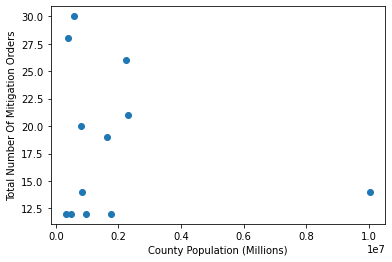

In [80]:
plt.scatter(county_pop_mention_df['Population'], county_pop_mention_df['Mentioned'])
plt.xlabel("County Population (Millions)")
plt.ylabel("Total Number Of Mitigation Orders")
plt.show()

In [81]:
print("Correlation coefficient between county population and the number of orders is {}".format(np.corrcoef(county_pop_mention_df['Population'],county_pop_mention_df['Mentioned'])))

Correlation coefficient between county population and the number of orders is [[ 1.         -0.16798491]
 [-0.16798491  1.        ]]


There does not seem to be a trend between higher population place vs. more number of mitigation measures. Analysis is done on a county level.

**For each of these top 10 most mentioned counties, let's see the diversity in terms of mitigation type, how frequent they are and how does that affect death/hospitalization rate.**

In [82]:
top_10_counties_mentioned_and_its_fips = {
    'LA,New Orleans': 22071,
    'MA,Boston' : 25025,
    'NY,New York City' : 36061,
    'IA,Polk' : 0,
    'MI,Wayne' : 0,
    'NE,Lancaster' : 0,
    'TX,Austin' : 0,
    'CA,Los Angeles' : 0,
    'MD,Baltimore' : 24005,
    'TX,Houston' : 0,
    'WA,King' : 0,
    'NE,Douglas' : 0 
}
county_pop[county_pop["State"] == 'CA'][county_pop["County Name"].str.contains("Los Angeles")]["countyFIPS"].values[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


6037

In [83]:
for key in top_10_counties_mentioned_and_its_fips.keys():
  if top_10_counties_mentioned_and_its_fips[key] == 0:
    print(county)
    state = str(key.split(",")[0])
    county = str(key.split(",")[1])
    top_10_counties_mentioned_and_its_fips[key] = county_pop[county_pop["State"] == state][county_pop["County Name"].str.contains(county)]["countyFIPS"].values[0]
top_10_counties_mentioned_and_its_fips

Douglas
Polk
Wayne
Lancaster
Austin
Los Angeles
Houston
King


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


{'CA,Los Angeles': 6037,
 'IA,Polk': 19153,
 'LA,New Orleans': 22071,
 'MA,Boston': 25025,
 'MD,Baltimore': 24005,
 'MI,Wayne': 26163,
 'NE,Douglas': 31055,
 'NE,Lancaster': 31109,
 'NY,New York City': 36061,
 'TX,Austin': 48015,
 'TX,Houston': 48225,
 'WA,King': 53033}

In [84]:
county_pop_mention_df['FIPS'] = pd.Series()
for key in top_10_counties_mentioned_and_its_fips.keys():
  state = key.split(",")[0]
  county = ", " + key.split(",")[1]
  fips = top_10_counties_mentioned_and_its_fips[key]
  state_county = state + county
  county_pop_mention_df.loc[county_pop_mention_df['Counties'] == state_county, 'FIPS'] = fips


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [85]:
county_pop_mention_df

Counties  Population  Mentioned     FIPS
0     LA, New Orleans      390144         28  22071.0
1          MA, Boston      803907         20  25025.0
2   NY, New York City     1628706         19  36061.0
3            IA, Polk      490161         12  19153.0
4           MI, Wayne     1749343         12  26163.0
5       NE, Lancaster      319090         12  31109.0
6          TX, Austin      964254         12  48015.0
7     CA, Los Angeles    10039107         14   6037.0
8       MD, Baltimore      827370         14  24005.0
9         TX, Houston     2296800         21  48225.0
10           WA, King     2252782         26  53033.0
11        NE, Douglas      571327         30  31055.0

**Diversity in terms of mitigation type**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


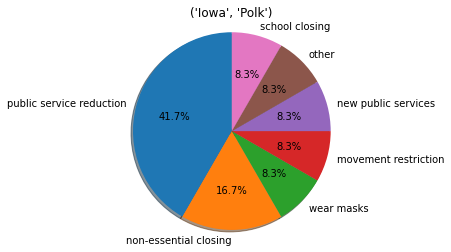

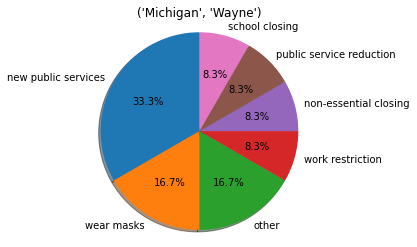

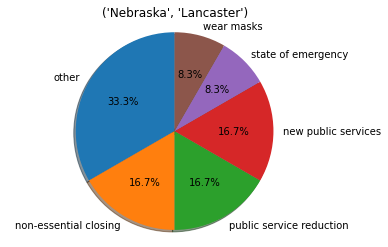

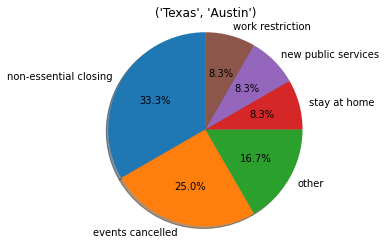

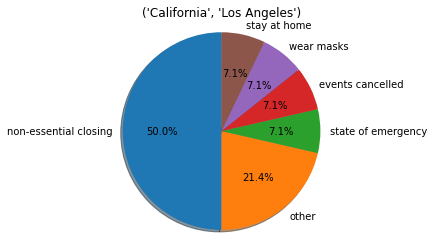

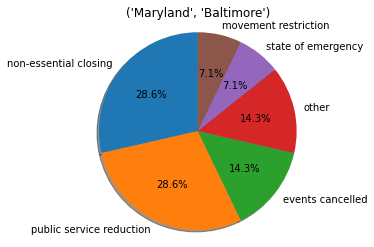

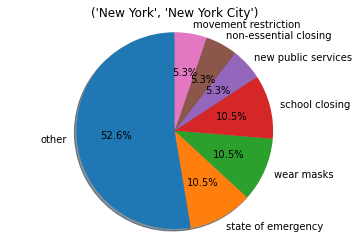

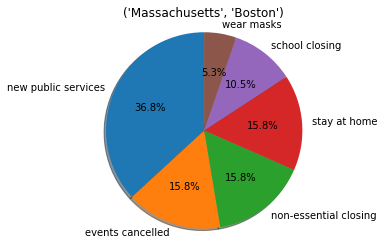

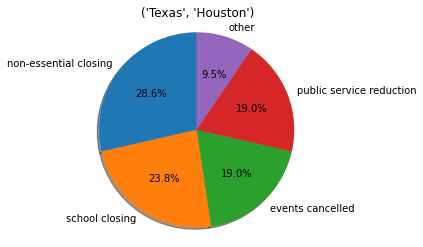

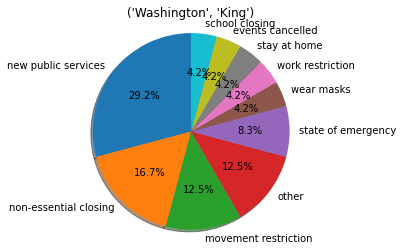

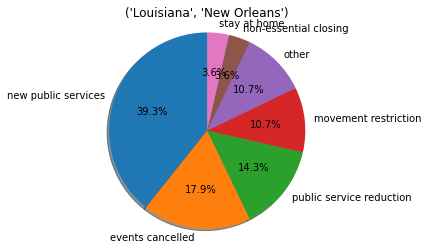

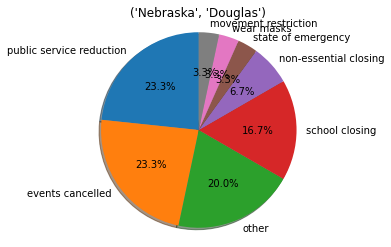

In [86]:
for county in top_10_counties_list:
  state_name = county[0]
  county_name = county[1]
  df = central_data[central_data['County'] == county_name][central_data['State'] == state_name]['Mitigation type'].value_counts().rename_axis('mitigation types').to_frame('counts')
  fig1, ax1 = plt.subplots()
  ax1.pie(df['counts'], labels=df.index, autopct='%1.1f%%', shadow=True, startangle=90)
  ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  ax1.set_title(county)
  plt.show()

From observing the 10 most mentioned counties, they all seem to a diverse amount of mitigation responses meaning that most of these counties do not have one type of mitigation response that overwhelmed the others, except for maybe one or two. The most common type of mitigation responses among these 10 counties are public service reduction, non-essential closing, new public services and others. 

**How frequent are these mitigation responses for each of these counties?**

Are they spread out or close to each other?

In [87]:
county_pop_mention_df['Average Day Per Response'] = pd.Series()

for state_county in top_10_counties_list:
  state = state_county[0]
  county = state_county[1]
  df = central_data[central_data['County'] == county][central_data['State'] == state]

  # find the date range
  df['Date'] = pd.to_datetime(df['Date'])
  date_range = df['Date'].max() - df['Date'].min()
  print(df['Date'].max())
  print(df['Date'].min())
  print(date_range.days)

  # find the average days per order.
  print(state_county)
  avg = date_range.days / df.shape[0]

  # adding to the DataFrame
  state_abr = us_state_abbrev[state]
  df_indx = state_abr + ", " + county
  county_pop_mention_df.loc[county_pop_mention_df['Counties'] == df_indx, 'Average Day Per Response'] = avg

2020-04-07 00:00:00
2020-03-03 00:00:00
35
('Iowa', 'Polk')
2020-04-08 00:00:00
2020-03-09 00:00:00
30
('Michigan', 'Wayne')
2020-04-10 00:00:00
2020-02-28 00:00:00
42
('Nebraska', 'Lancaster')
2020-04-03 00:00:00
2020-03-06 00:00:00
28
('Texas', 'Austin')
2020-04-11 00:00:00
2020-03-04 00:00:00
38
('California', 'Los Angeles')
2020-03-24 00:00:00
2020-03-01 00:00:00
23
('Maryland', 'Baltimore')
2020-04-11 00:00:00
2020-03-08 00:00:00
34
('New York', 'New York City')
2020-04-07 00:00:00
2020-02-01 00:00:00
66
('Massachusetts', 'Boston')
2020-04-06 00:00:00
2020-03-06 00:00:00
31
('Texas', 'Houston')
2020-04-10 00:00:00
2020-02-29 00:00:00
41
('Washington', 'King')
2020-03-30 00:00:00
2020-03-09 00:00:00
21
('Louisiana', 'New Orleans')
2020-04-10 00:00:00
2020-03-07 00:00:00
34
('Nebraska', 'Douglas')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [88]:
county_pop_mention_df

Counties  Population  Mentioned     FIPS  Average Day Per Response
0     LA, New Orleans      390144         28  22071.0                  0.750000
1          MA, Boston      803907         20  25025.0                  3.300000
2   NY, New York City     1628706         19  36061.0                  1.789474
3            IA, Polk      490161         12  19153.0                  2.916667
4           MI, Wayne     1749343         12  26163.0                  2.500000
5       NE, Lancaster      319090         12  31109.0                  3.500000
6          TX, Austin      964254         12  48015.0                  2.333333
7     CA, Los Angeles    10039107         14   6037.0                  2.714286
8       MD, Baltimore      827370         14  24005.0                  1.642857
9         TX, Houston     2296800         21  48225.0                  1.476190
10           WA, King     2252782         26  53033.0                  1.576923
11        NE, Douglas      571327         30  31055.0                  1.133333

In [89]:
county_pop_mention_df.sort_values(by=['Average Day Per Response'])['Counties']

0       LA, New Orleans
11          NE, Douglas
9           TX, Houston
10             WA, King
8         MD, Baltimore
2     NY, New York City
6            TX, Austin
4             MI, Wayne
7       CA, Los Angeles
3              IA, Polk
1            MA, Boston
5         NE, Lancaster
Name: Counties, dtype: object

The above table shows from the least to the highest frequent of mitigation responses. So New Orleans is the least while Lancaster, NE has the most frequent orders.

**Is there a relationship between population and how frequent these responses are?**

In [90]:
norm_pop = (county_pop_mention_df['Population'] - county_pop_mention_df['Population'].mean()) / county_pop_mention_df['Population'].std()
norm_avg_days_resp = (county_pop_mention_df['Average Day Per Response'] - county_pop_mention_df['Average Day Per Response'].mean()) / county_pop_mention_df['Average Day Per Response'].std()
np.corrcoef(norm_pop, norm_avg_days_resp)

array([[1.        , 0.13758387],
       [0.13758387, 1.        ]])

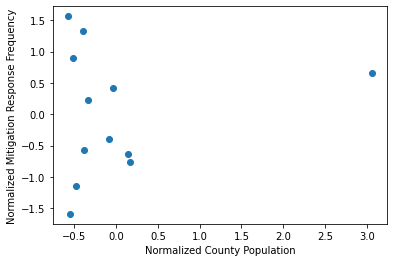

In [91]:
plt.scatter(norm_pop, norm_avg_days_resp)
plt.xlabel("Normalized County Population")
plt.ylabel("Normalized Mitigation Response Frequency")
plt.show()

There seems to be a weak, positive relationship between a county's population and how frequent these responses are.

**Does the frequency of these responses affect death/hospitalization rate?**

The way that we are going to explore this is to graph cases/death/hospitalization rate over time along with the type of mitigation measures.

In [92]:
us_counties.head()

date     county       state     fips  cases  deaths
0  2020-01-21  Snohomish  Washington  53061.0      1       0
1  2020-01-22  Snohomish  Washington  53061.0      1       0
2  2020-01-23  Snohomish  Washington  53061.0      1       0
3  2020-01-24       Cook    Illinois  17031.0      1       0
4  2020-01-24  Snohomish  Washington  53061.0      1       0

In [93]:
daily.head()

date state  ...  positiveIncrease  totalTestResultsIncrease
0  20200424    AK  ...               2.0                     120.0
1  20200424    AL  ...              54.0                      54.0
2  20200424    AR  ...             276.0                    3988.0
3  20200424    AS  ...               0.0                       0.0
4  20200424    AZ  ...             276.0                    2017.0

[5 rows x 25 columns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


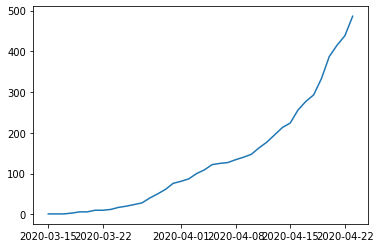

In [94]:
# trying out a plotting example for Polk, IA
polk_IA_cases_death = us_counties[us_counties['fips'] == 19153.0]
polk_IA_cases_death['date'] = pd.to_datetime(polk_IA_cases_death['date'])
plt.plot(polk_IA_cases_death['date'], polk_IA_cases_death['cases'])
plt.show()

It looks like the data is culmulative so we need to plot discrete data instead of culmulative.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

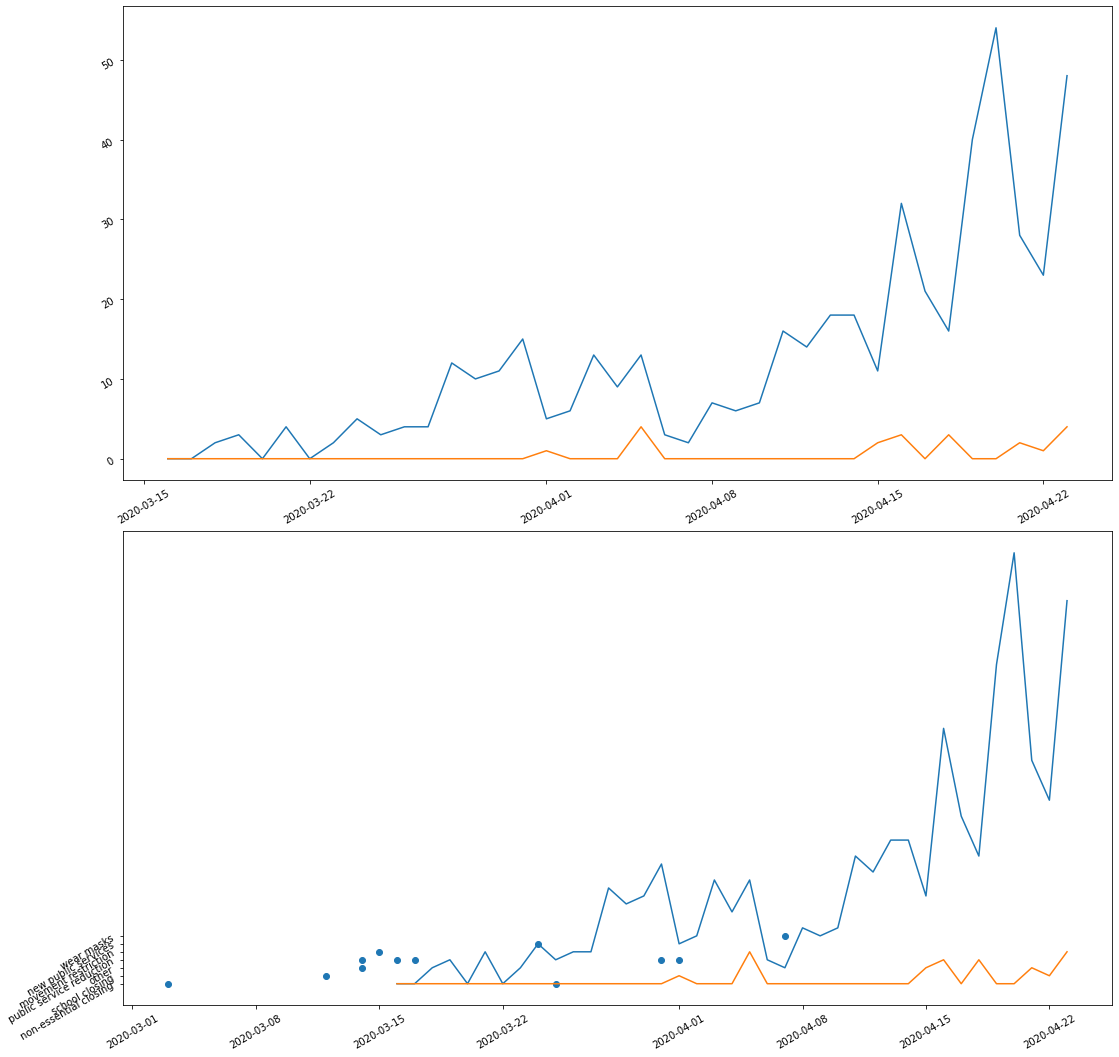

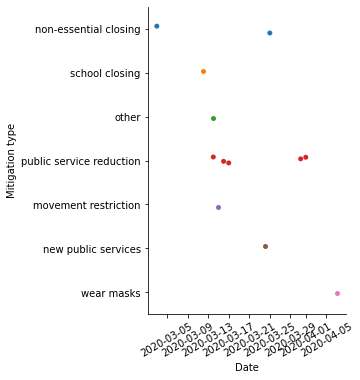

In [95]:
polk_IA_cases_death = us_counties[us_counties['fips'] == 19153.0]
polk_IA_cases_death['date'] = pd.to_datetime(polk_IA_cases_death['date'])
polk_IA_cases_death['cases'] = polk_IA_cases_death['cases'].diff()
polk_IA_cases_death['deaths'] = polk_IA_cases_death['deaths'].diff()
central_data_polk_IA = central_data[central_data['County'] == 'Polk'][central_data['State'] == 'Iowa']
central_data_polk_IA['Date'] = pd.to_datetime(central_data_polk_IA['Date'])
'''
plt.plot(polk_IA_cases_death['date'], polk_IA_cases_death['cases'])
plt.plot(polk_IA_cases_death['date'], polk_IA_cases_death['deaths'])
#plt.scatter(central_data_polk_IA['Date'], central_data_polk_IA['Mitigation type'])
plt.xticks(rotation=90)
#tips = sns.load_dataset("tips")
g= sns.catplot(x="Date", y="Mitigation type", data=central_data_polk_IA);
g.set_xticklabels(rotation=30)
#plt.plot(central_data_polk_IA['Date'], central_data_polk_IA['Mitigation type'], marker='.', lw=0, ms=10)
plt.show()
'''

fig, ax = plt.subplots(2, 1, figsize=(15,15))
fig.tight_layout(pad=3.0)

# top left
ax[0].plot(polk_IA_cases_death['date'], polk_IA_cases_death['cases'])
ax[0].plot(polk_IA_cases_death['date'], polk_IA_cases_death['deaths'])
ax[0].tick_params(labelrotation=30)

# top right
ax[1].plot(polk_IA_cases_death['date'], polk_IA_cases_death['cases'])
ax[1].plot(polk_IA_cases_death['date'], polk_IA_cases_death['deaths'])
ax[1].scatter(central_data_polk_IA['Date'], central_data_polk_IA['Mitigation type'])
ax[1].tick_params(labelrotation=30)

plt.show()

g= sns.catplot(x="Date", y="Mitigation type", data=central_data_polk_IA);
g.set_xticklabels(rotation=30)

In [ ]:
def min_max_norm(dfCol):
  return (dfCol - dfCol.mean())/dfCol.std()
  
# state must be in the form of full name
def mitigation_vs_cases(state, county, fips):
  cases_death = us_counties[us_counties['fips'] == fips]
  cases_death['date'] = pd.to_datetime(cases_death['date'])
  cases_death['cases'] = cases_death['cases'].diff()
  cases_death['deaths'] = cases_death['deaths'].diff()

  # normalize the data
  cases_death['cases'] = min_max_norm(cases_death['cases'])
  cases_death['deaths'] = min_max_norm(cases_death['deaths'])

  mitigation_data = central_data[central_data['County'] == county][central_data['State'] == state]
  mitigation_data['Date'] = pd.to_datetime(mitigation_data['Date'])

  print(county, state)

  fig, ax = plt.subplots(2, 1, figsize=(12,12))
  fig.tight_layout(pad=5.0)

  # top left
  ax[0].plot(cases_death['date'], cases_death['cases'], label='new cases')
  ax[0].plot(cases_death['date'], cases_death['deaths'], label='new deaths')
  ax[0].legend()
  ax[0].tick_params(labelrotation=30)

  # top right
  ax[1].plot(cases_death['date'], cases_death['cases'], label='new cases')
  ax[1].plot(cases_death['date'], cases_death['deaths'], label='new deaths')
  ax[1].scatter(mitigation_data['Date'], mitigation_data['Mitigation type'])
  ax[1].legend()
  ax[1].tick_params(labelrotation=30)

  plt.title('Mitigations vs. death/hospitalization rate in {}, {}'.format(county, state))
  plt.show()
  print("-" * 20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

Polk Iowa


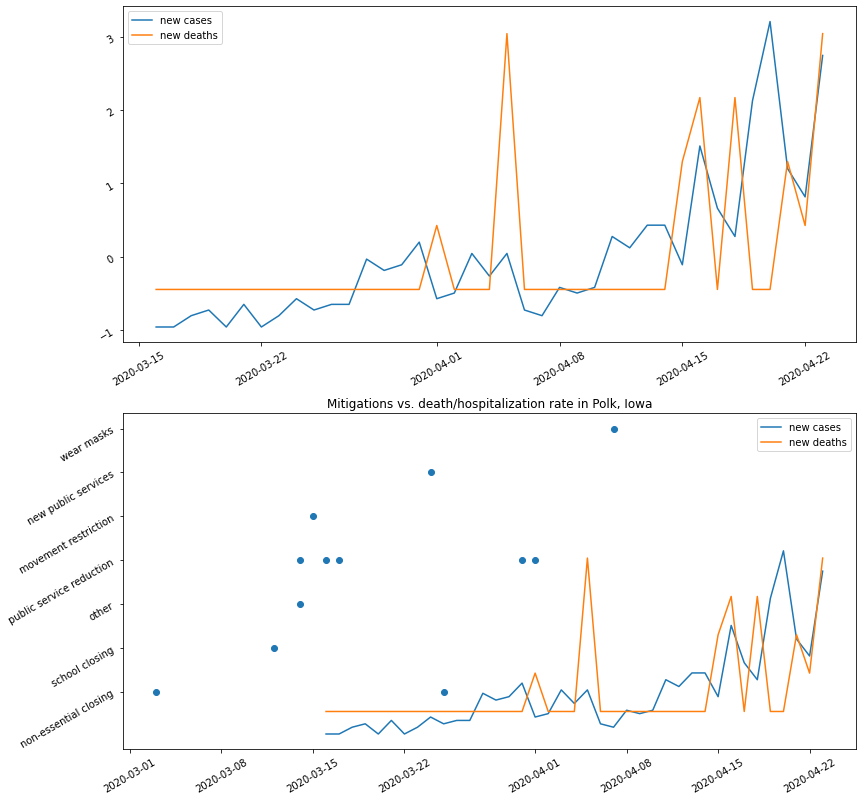

--------------------
Wayne Michigan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

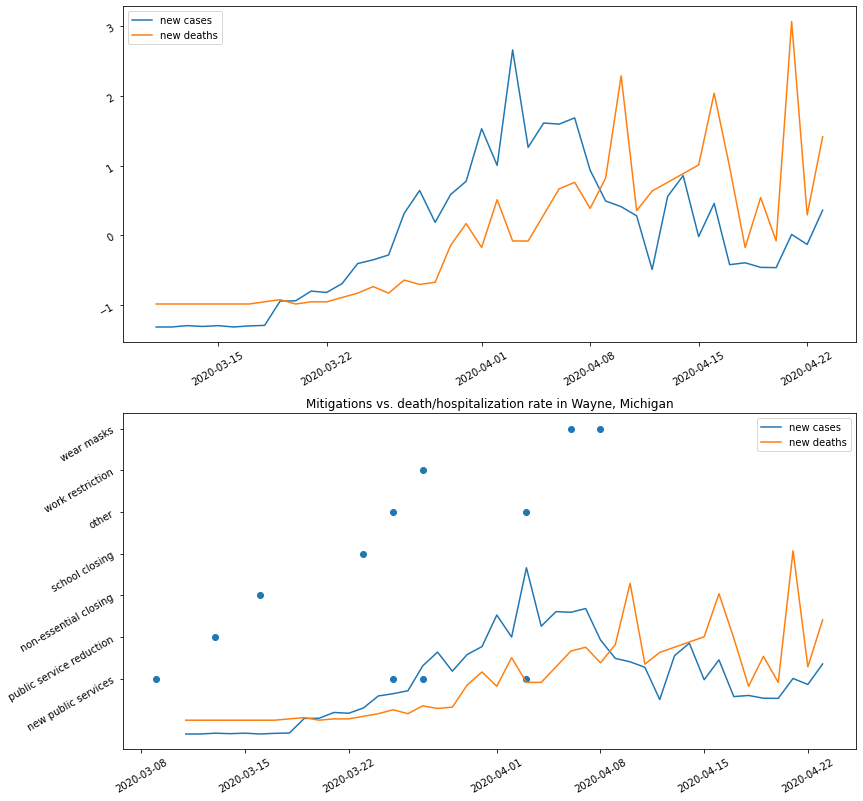

--------------------
Lancaster Nebraska


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

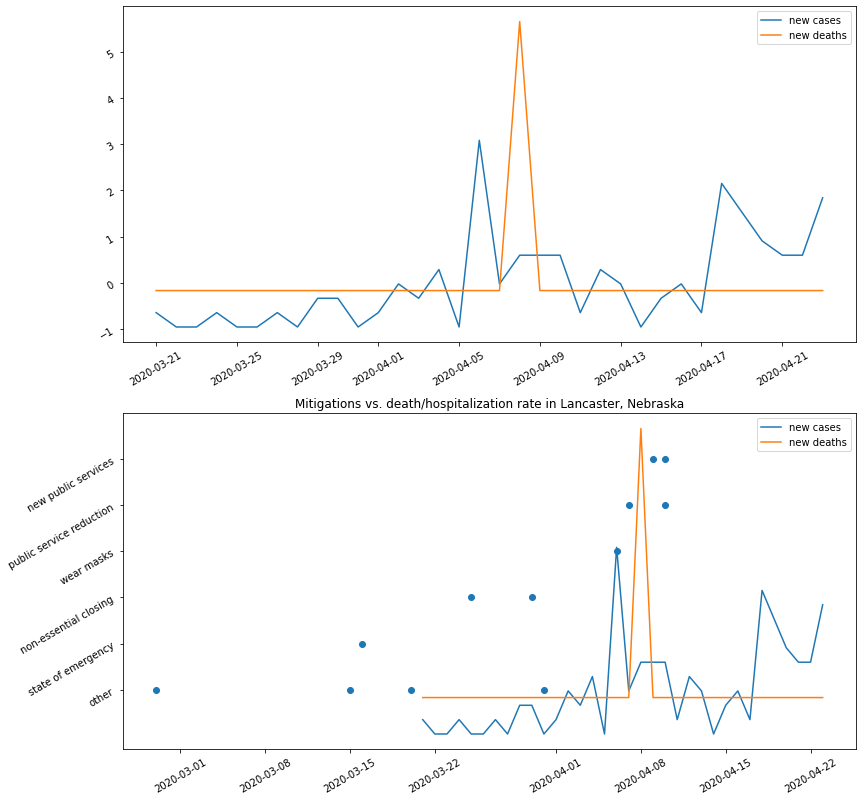

--------------------
Austin Texas


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

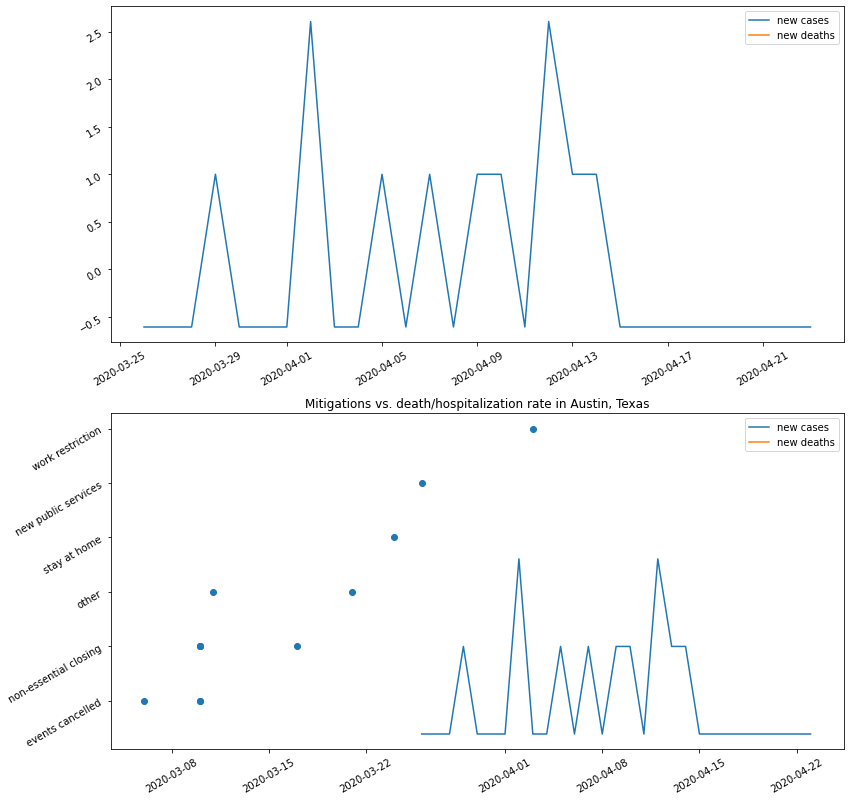

--------------------
Los Angeles California


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

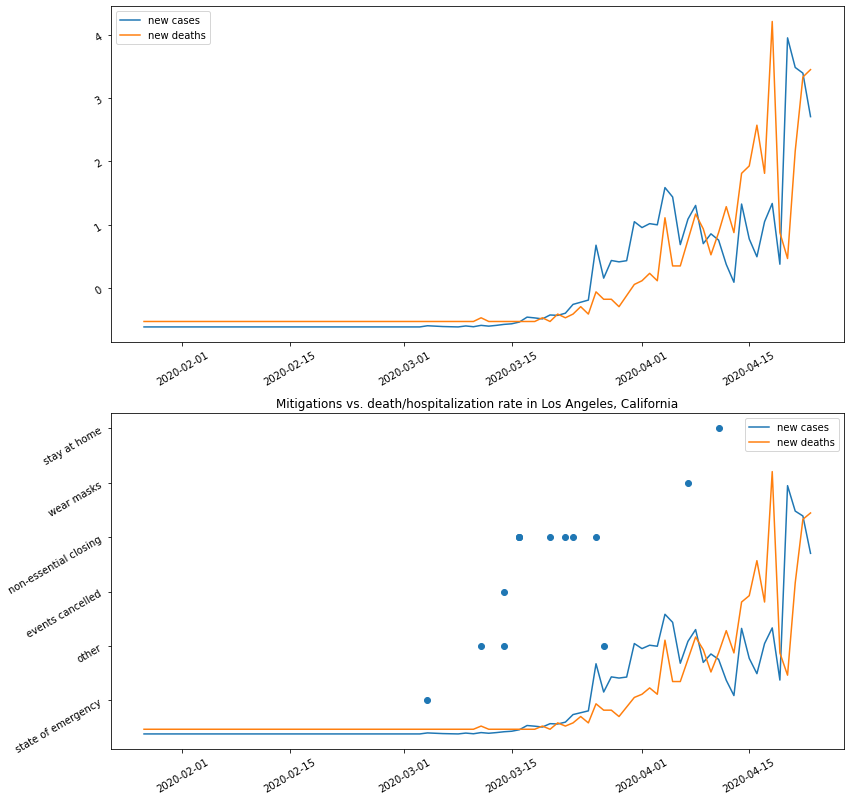

--------------------
Baltimore Maryland


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

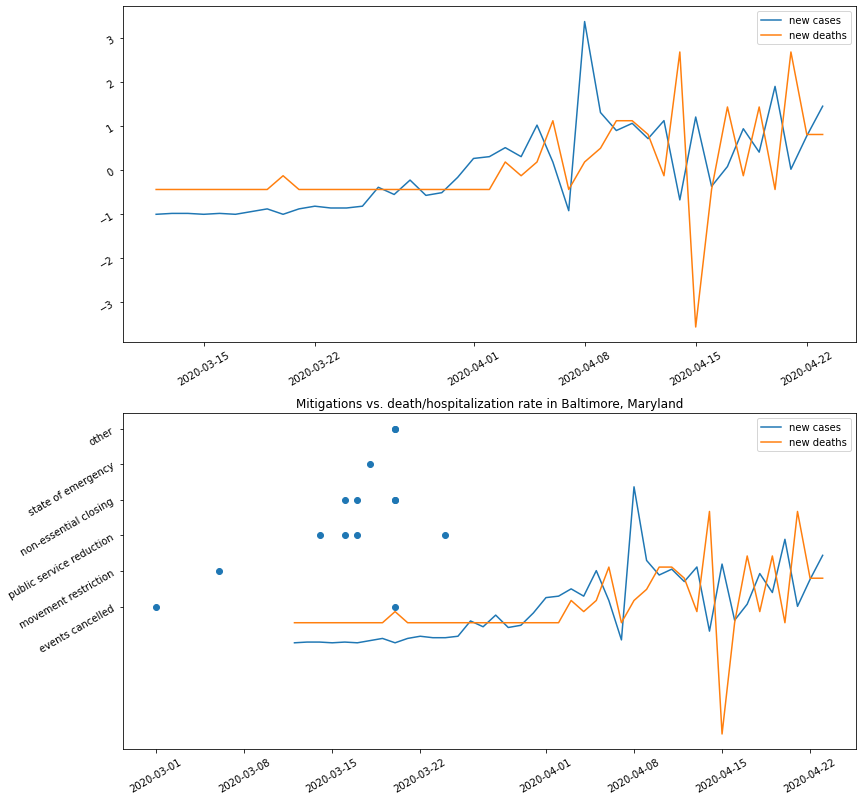

--------------------
New York City New York


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


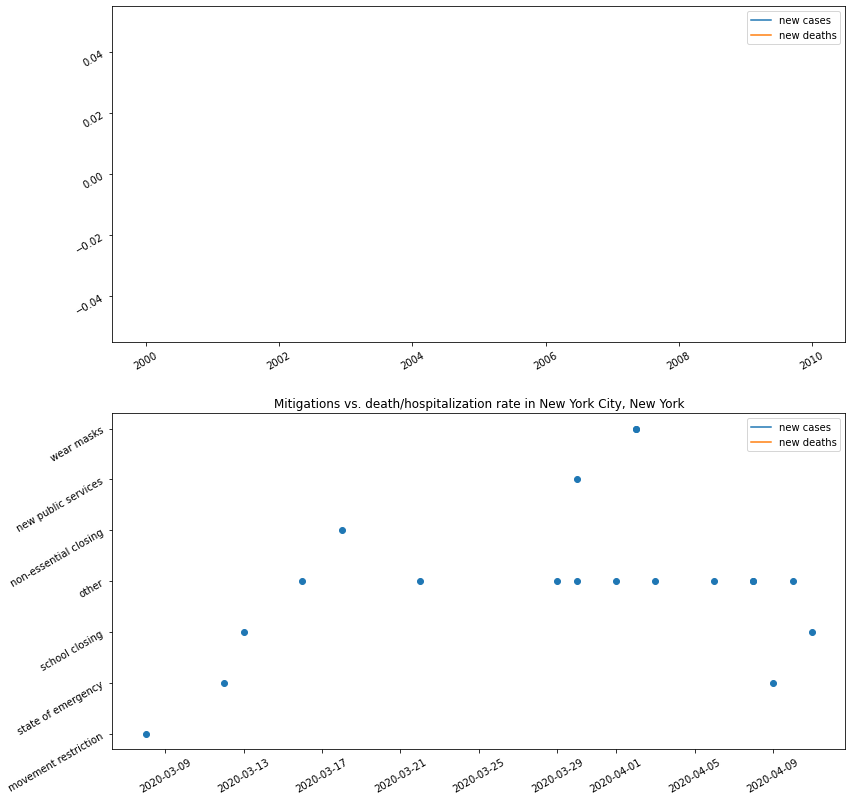

--------------------
Boston Massachusetts


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

ValueError: ignored

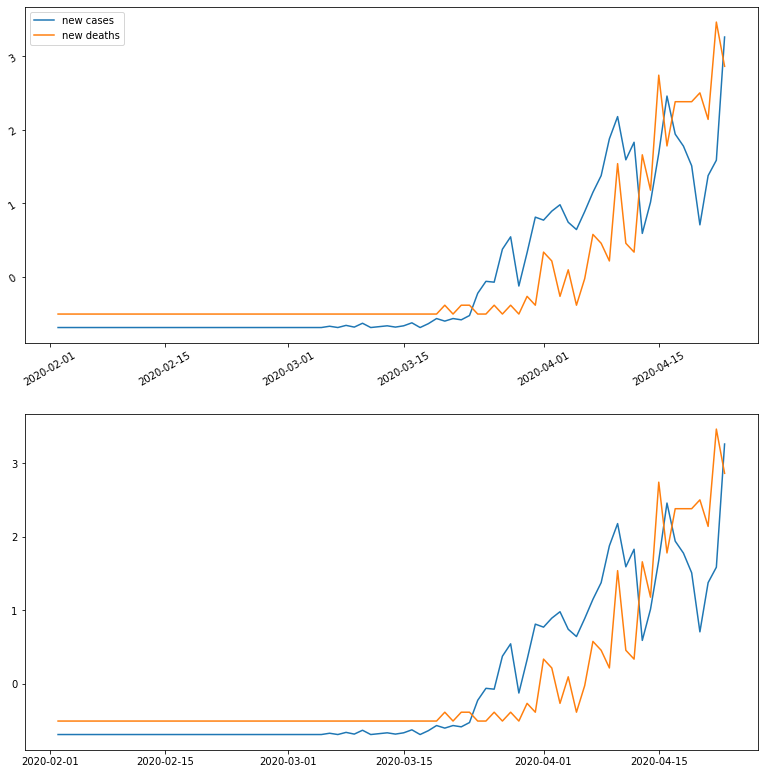

In [97]:
for state_county in top_10_counties_list:
  state = us_state_abbrev[state_county[0]]
  county = state_county[1]
  fips = county_pop_mention_df[county_pop_mention_df['Counties'] == state + ", " + county]['FIPS'].values[0]
  mitigation_vs_cases(state_county[0], county, fips)

In [98]:
'''top_10_mitigation_data = 
g= sns.catplot(x="Date", y="Mitigation type", data=top_10_mitigation_data);
g.set_xticklabels(rotation=30)'''
us_counties[us_counties['county'] == 'New York City'][us_counties['state'] == 'New York'].head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


date         county     state  fips  cases  deaths
416  2020-03-01  New York City  New York   NaN      1       0
448  2020-03-02  New York City  New York   NaN      1       0
482  2020-03-03  New York City  New York   NaN      2       0
518  2020-03-04  New York City  New York   NaN      2       0
565  2020-03-05  New York City  New York   NaN      4       0

It seems like we have the right fips code for NYC but in us_counties, it does not have fips for NYC. So we changing it to the correct code

In [99]:
us_counties.loc[(us_counties['county'] == 'New York City') & (us_counties['state'] == 'New York'), 'fips'] = 36061
us_counties[us_counties['county'] == 'New York City'][us_counties['state'] == 'New York'].head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


date         county     state     fips  cases  deaths
416  2020-03-01  New York City  New York  36061.0      1       0
448  2020-03-02  New York City  New York  36061.0      1       0
482  2020-03-03  New York City  New York  36061.0      2       0
518  2020-03-04  New York City  New York  36061.0      2       0
565  2020-03-05  New York City  New York  36061.0      4       0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

New York City New York


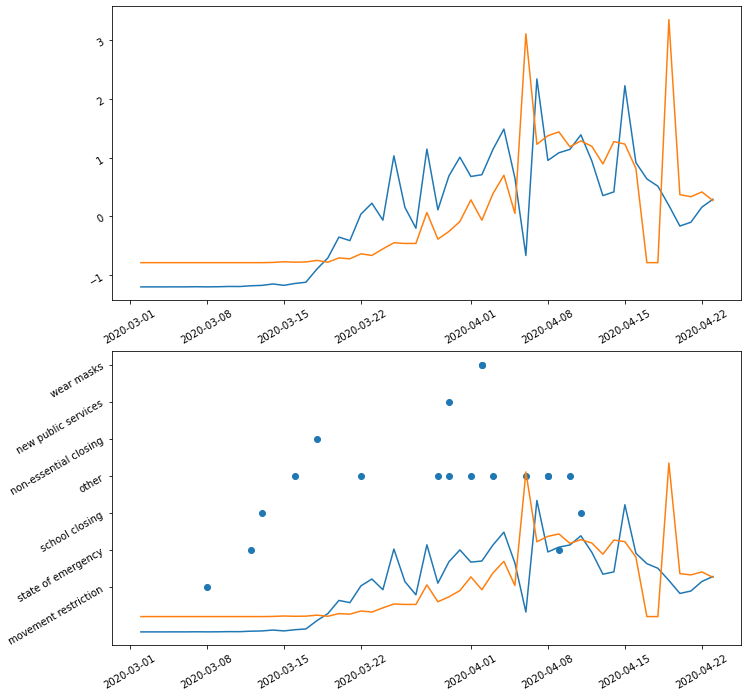

--------------------


In [100]:
# plotting NYC city
cases_death = us_counties[us_counties['fips'] == 36061.0]
cases_death['date'] = pd.to_datetime(cases_death['date'])
cases_death['cases'] = cases_death['cases'].diff()
cases_death['deaths'] = cases_death['deaths'].diff()
mitigation_data = central_data[central_data['County'] == 'New York City'][central_data['State'] == 'New York']
mitigation_data['Date'] = pd.to_datetime(mitigation_data['Date'])

# normalize the data
cases_death['cases'] = min_max_norm(cases_death['cases'])
cases_death['deaths'] = min_max_norm(cases_death['deaths'])

print("New York City", 'New York')

fig, ax = plt.subplots(2, 1, figsize=(10,10))
fig.tight_layout(pad=3.0)

# top left
ax[0].plot(cases_death['date'], cases_death['cases'])
ax[0].plot(cases_death['date'], cases_death['deaths'])
ax[0].tick_params(labelrotation=30)

# top right
ax[1].plot(cases_death['date'], cases_death['cases'])
ax[1].plot(cases_death['date'], cases_death['deaths'])
ax[1].scatter(mitigation_data['Date'], mitigation_data['Mitigation type'])
ax[1].tick_params(labelrotation=30)

plt.show()
print("-" * 20)

It looks like for the top 10 most mentioned counties (aka. counties with the most mitigation measures), they tend to either occur before or around when the first cases/deaths reported or spread out throughout the months of March and April.

We also see that these mitigation measures also takes place when the death rate is stabilized so we can see that these measures do have an effect on the death rate. 

In terms of the number of cases, I think if we can get more data on new public services that are related to testing would be great. 

**Next, we will do the same analysis but on the state level**

**Diversity of mitigation type**

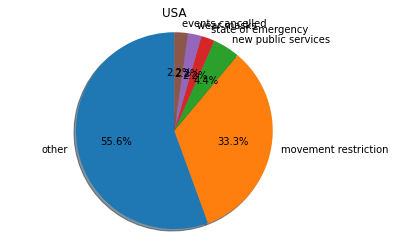

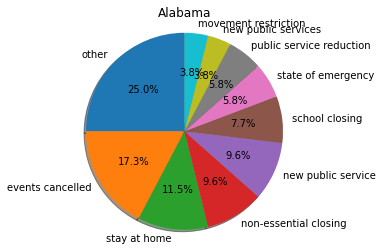

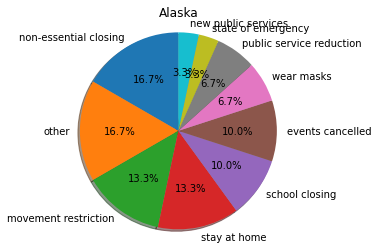

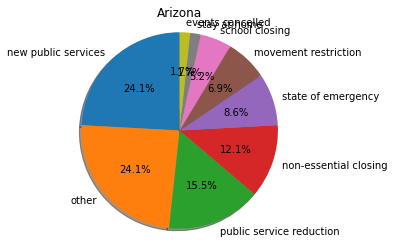

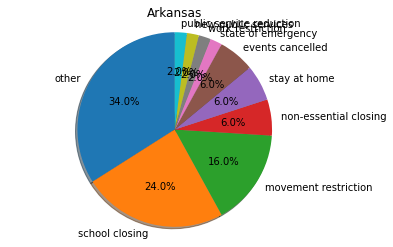

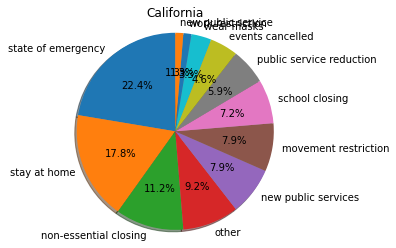

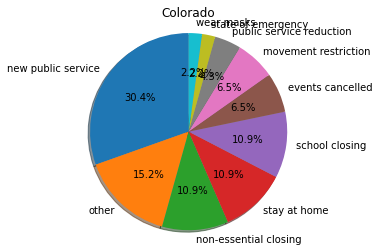

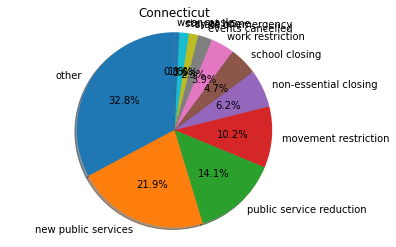

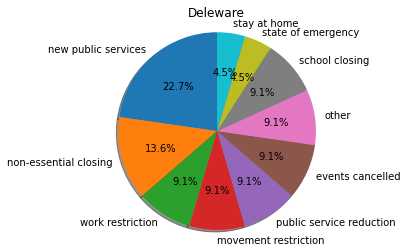

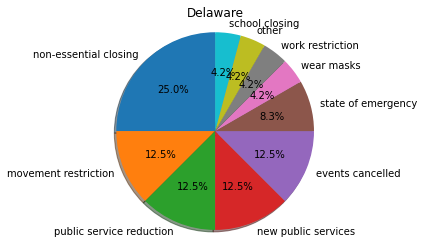

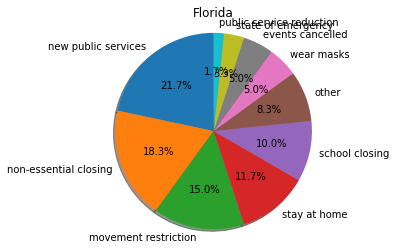

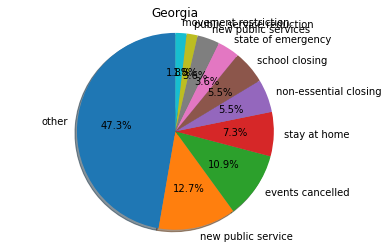

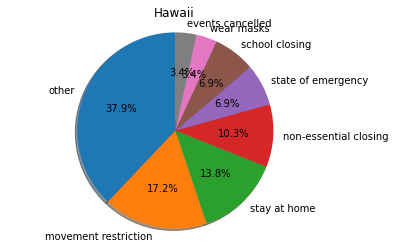

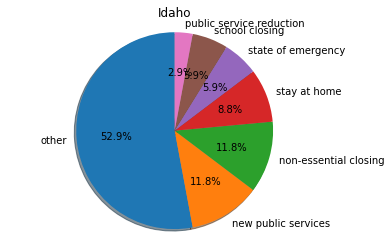

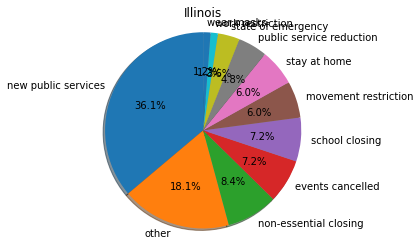

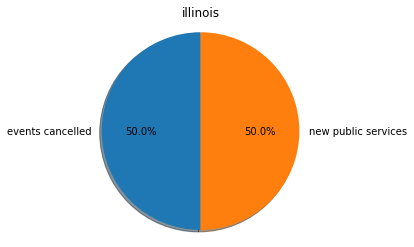

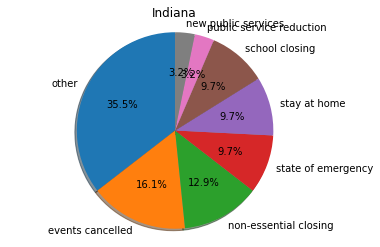

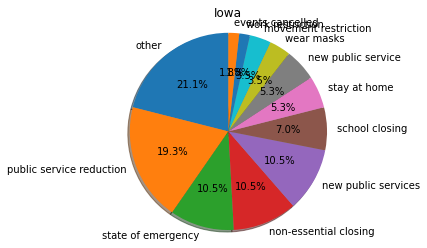

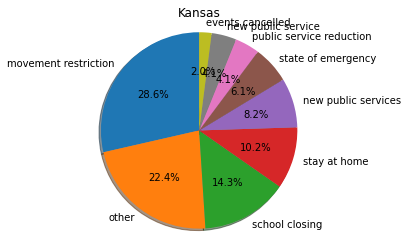

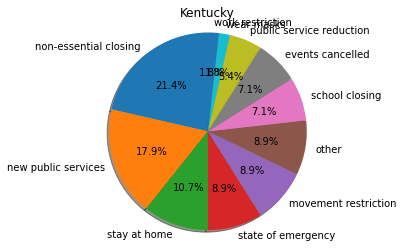

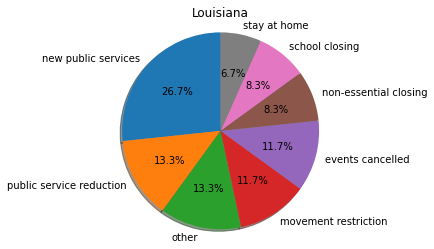

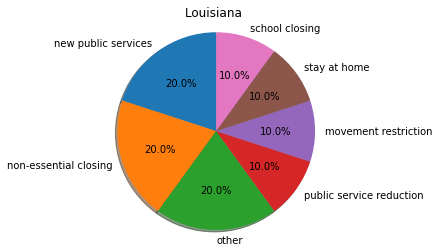

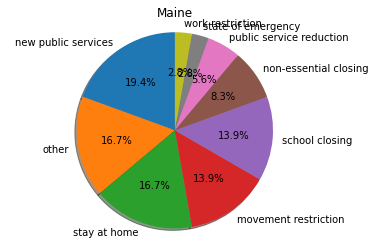

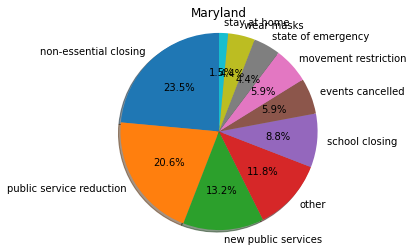

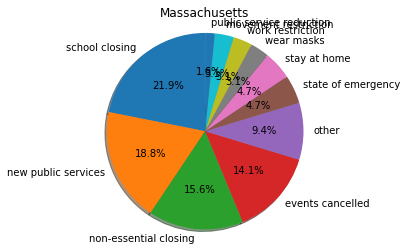

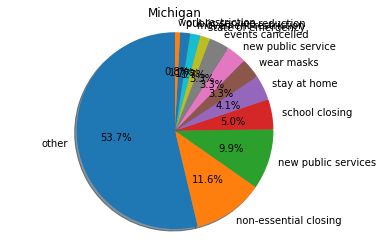

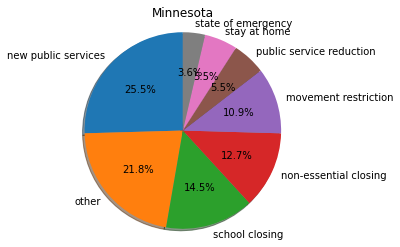

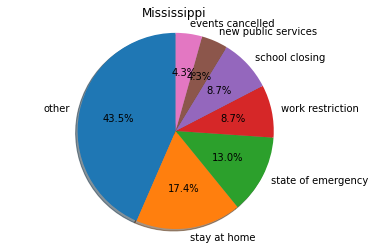

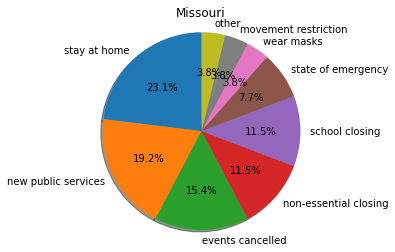

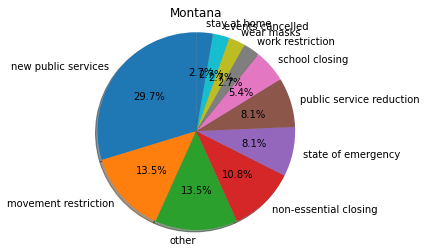

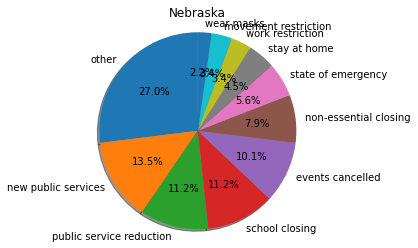

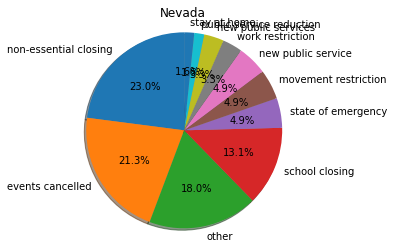

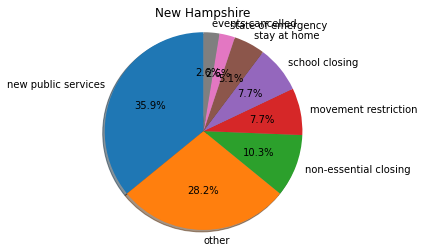

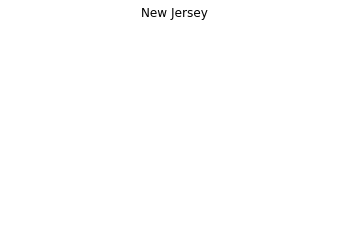

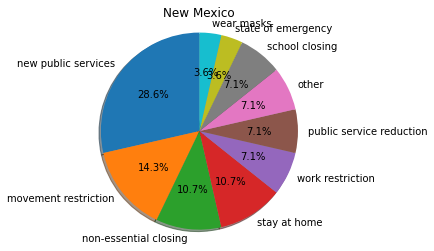

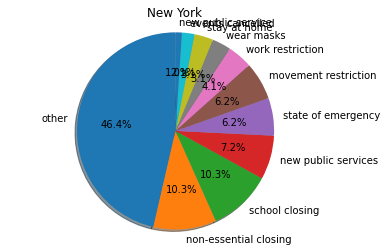

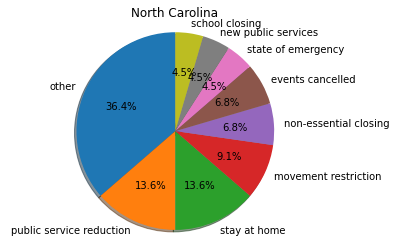

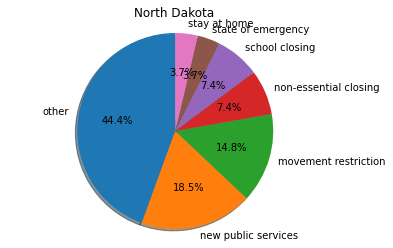

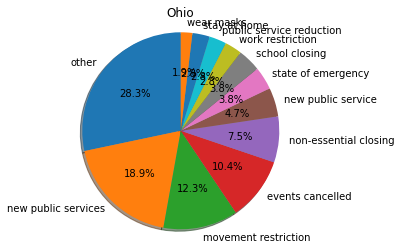

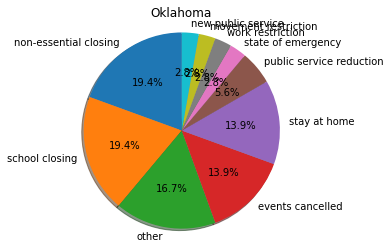

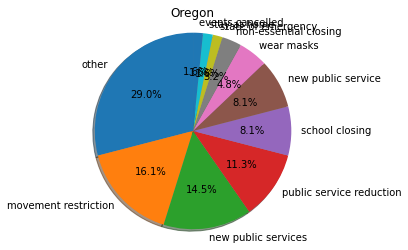

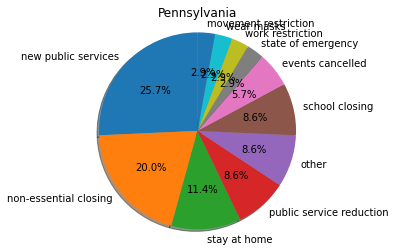

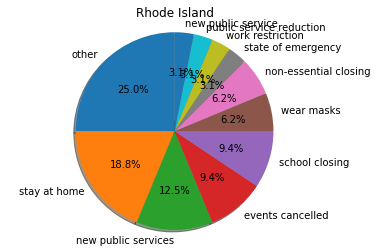

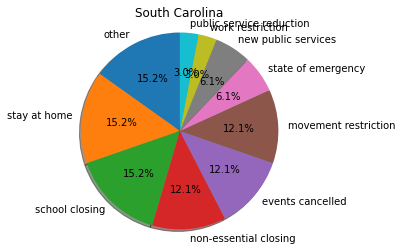

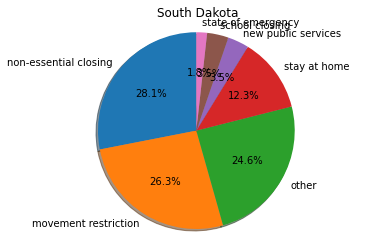

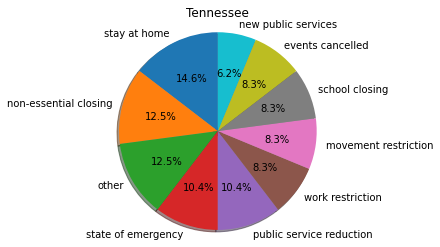

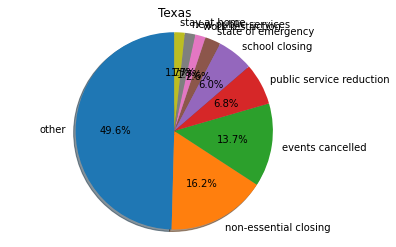

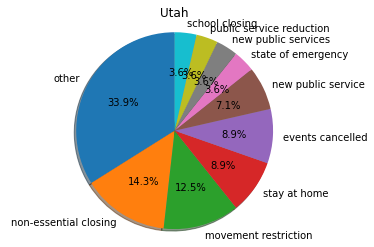

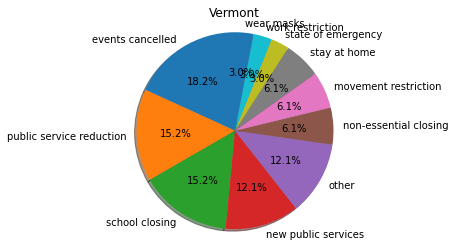

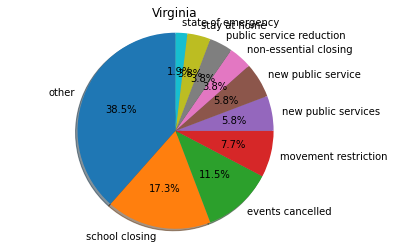

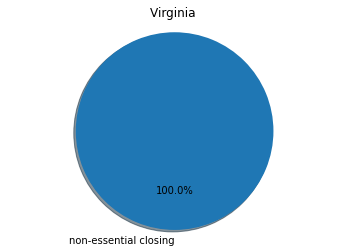

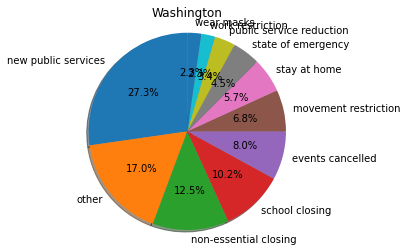

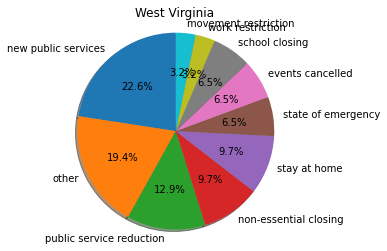

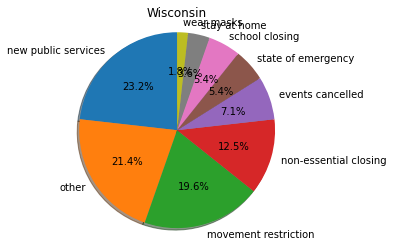

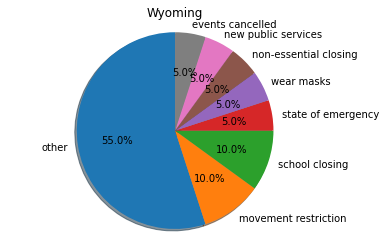

In [101]:
for state in list(central_data['State'].unique()):
  df = central_data[central_data['State'] == state]['Mitigation type'].value_counts().rename_axis('mitigation types').to_frame('counts')
  fig1, ax1 = plt.subplots()
  ax1.pie(df['counts'], labels=df.index, autopct='%1.1f%%', shadow=True, startangle=90)
  ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  ax1.set_title(state)
  plt.show()

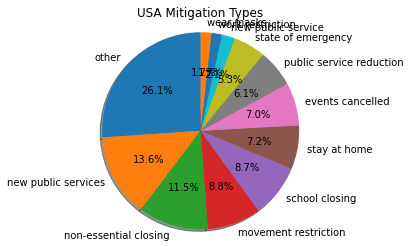

In [102]:
df = central_data['Mitigation type'].value_counts().rename_axis('mitigation types').to_frame('counts')
fig1, ax1 = plt.subplots()
ax1.pie(df['counts'], labels=df.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("USA Mitigation Types")
plt.show()

In [103]:
daily['date'] = pd.to_datetime(daily['date'], format="%Y%m%d")
daily.head()


date state  ...  positiveIncrease  totalTestResultsIncrease
0 2020-04-24    AK  ...               2.0                     120.0
1 2020-04-24    AL  ...              54.0                      54.0
2 2020-04-24    AR  ...             276.0                    3988.0
3 2020-04-24    AS  ...               0.0                       0.0
4 2020-04-24    AZ  ...             276.0                    2017.0

[5 rows x 25 columns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

New York


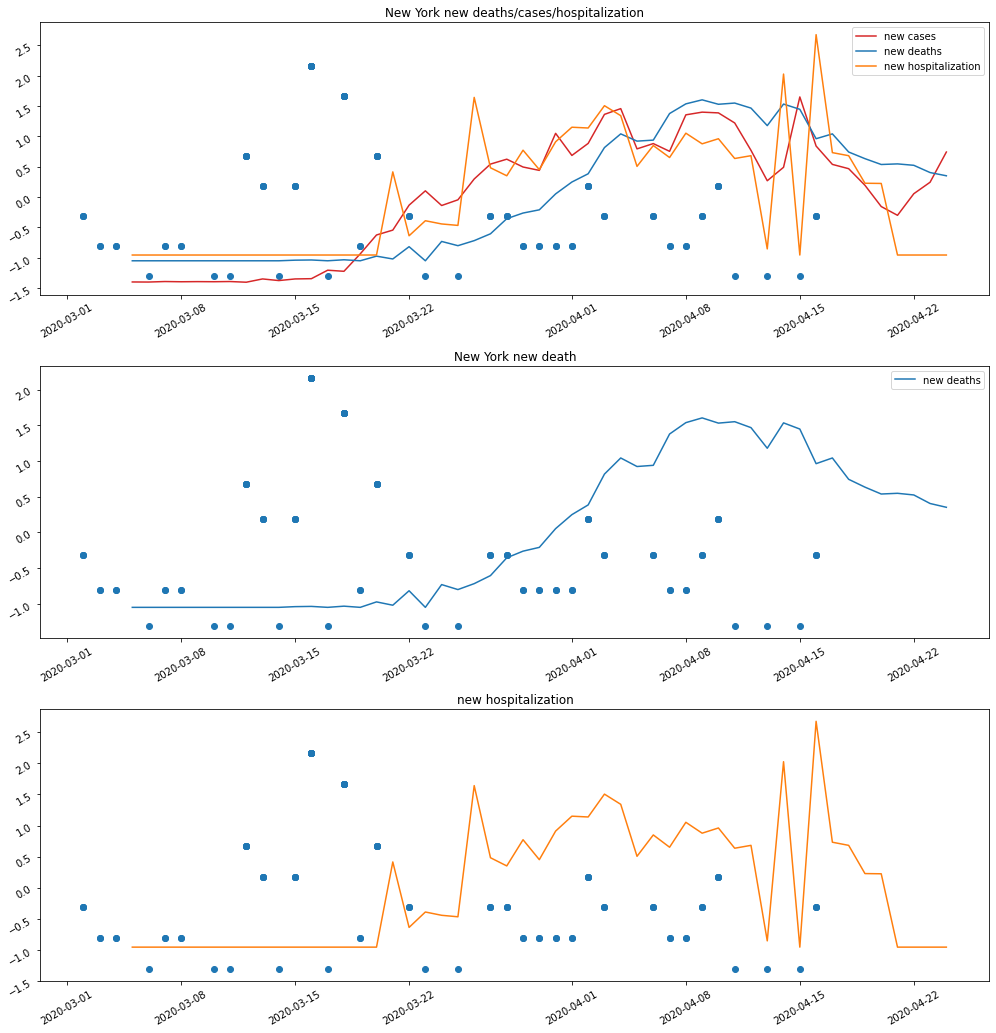

--------------------


In [115]:
# state must be in the form of full name
def mitigation_vs_cases_state_level(state):
  state_abr = us_state_abbrev[state]
  state_cases_death = daily[daily['state'] == state_abr]
  state_cases_death['date'] = pd.to_datetime(state_cases_death['date'])
  state_cases_death['positiveIncrease'] = state_cases_death['positiveIncrease']
  state_cases_death['deathIncrease'] = state_cases_death['deathIncrease']
  state_cases_death['hospitalizedIncrease'] = state_cases_death['hospitalizedIncrease']

  mitigation_data = central_data[central_data['State'] == state]
  mitigation_data['Date'] = pd.to_datetime(mitigation_data['Date'])

  mitigation_data['Number Of Responses'] = mitigation_data.groupby(['Date'])['Mitigation type'].transform('count')

  # normalize the data
  state_cases_death['positiveIncrease'] = min_max_norm(state_cases_death['positiveIncrease'])
  state_cases_death['deathIncrease'] = min_max_norm(state_cases_death['deathIncrease'])
  state_cases_death['hospitalizedIncrease'] = min_max_norm(state_cases_death['hospitalizedIncrease'])
  mitigation_data['Number Of Responses'] = min_max_norm(mitigation_data['Number Of Responses'])
  print(state)

  fig, ax = plt.subplots(3, 1, figsize=(15,15))
  fig.tight_layout(pad=5.0)

  # bottom first
  ax[0].plot(state_cases_death['date'], state_cases_death['positiveIncrease'], 'tab:red', label='new cases')
  ax[0].plot(state_cases_death['date'], state_cases_death['deathIncrease'], label='new deaths')
  ax[0].plot(state_cases_death['date'], state_cases_death['hospitalizedIncrease'], 'tab:orange', label='new hospitalization')
  ax[0].scatter(mitigation_data['Date'], mitigation_data['Number Of Responses'])
  ax[0].tick_params(labelrotation=30)
  ax[0].legend()
  ax[0].set_title('{} new deaths/cases/hospitalization'.format(state))

  # bottom middle
  ax[1].plot(state_cases_death['date'], state_cases_death['deathIncrease'], label='new deaths')
  ax[1].scatter(mitigation_data['Date'], mitigation_data['Number Of Responses'])
  ax[1].tick_params(labelrotation=30)
  ax[1].legend()
  ax[1].set_title('{} new death'.format(state))

  # bottom last
  ax[2].plot(state_cases_death['date'], state_cases_death['hospitalizedIncrease'], 'tab:orange', label='new hospitalization')
  ax[2].scatter(mitigation_data['Date'], mitigation_data['Number Of Responses'])
  ax[2].tick_params(labelrotation=30)
  ax[2].set_title('new hospitalization')

  plt.show()
  print("-" * 20)
mitigation_vs_cases_state_level('New York')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

Pennsylvania


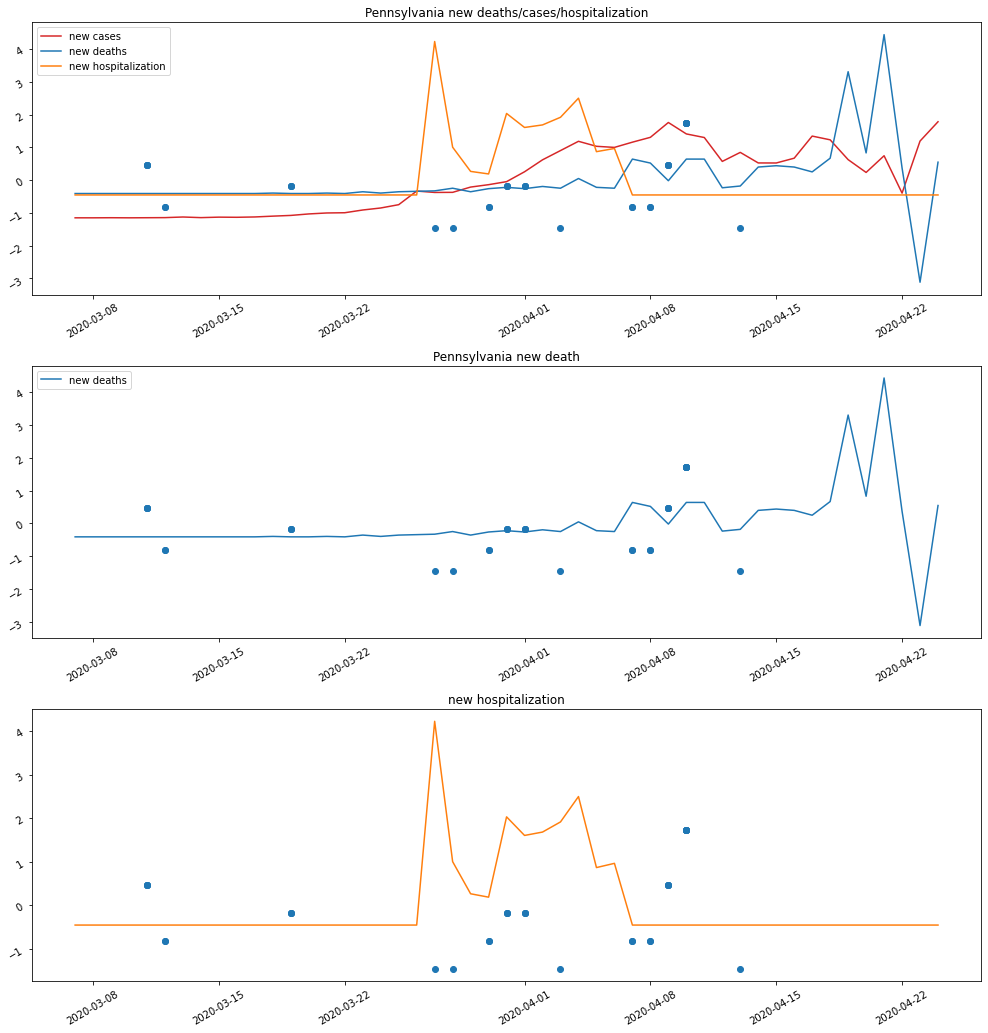

--------------------


In [116]:
mitigation_vs_cases_state_level('Pennsylvania')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

Iowa


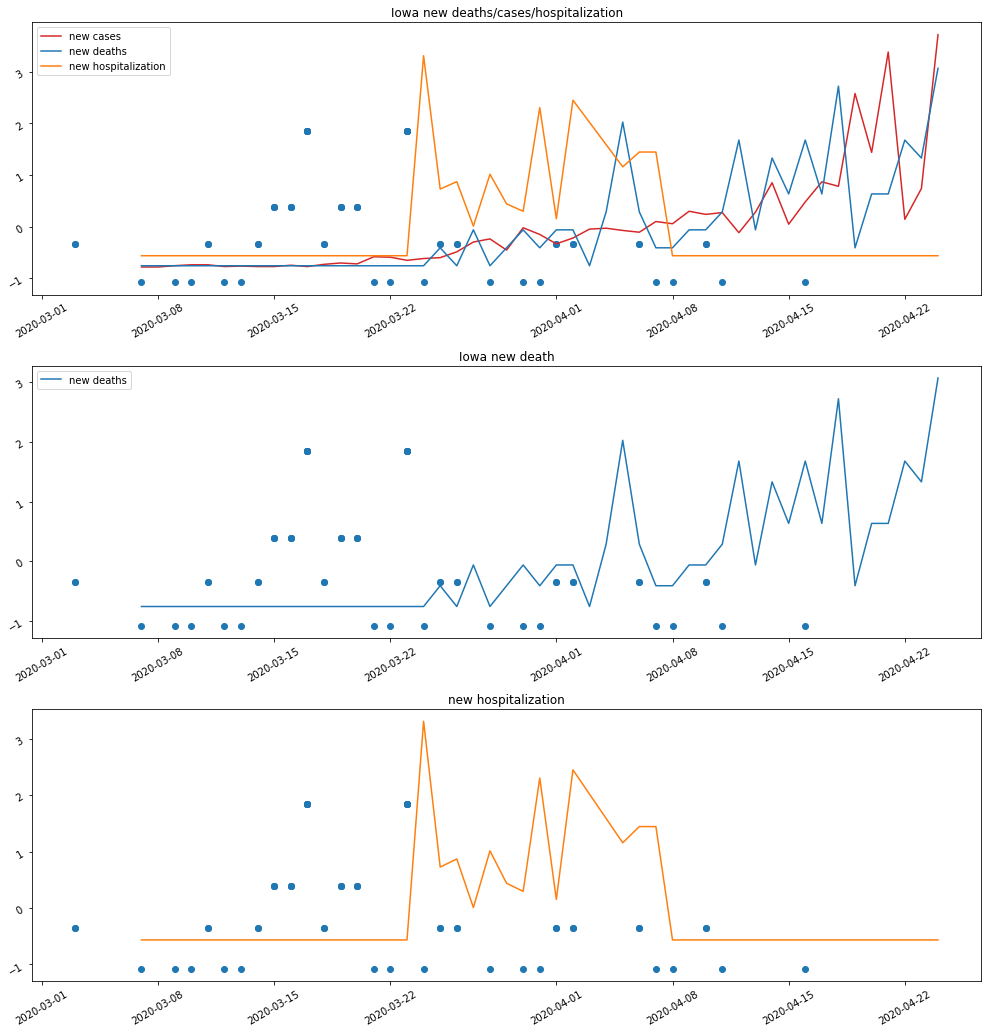

--------------------


In [117]:
mitigation_vs_cases_state_level('Iowa')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

Florida


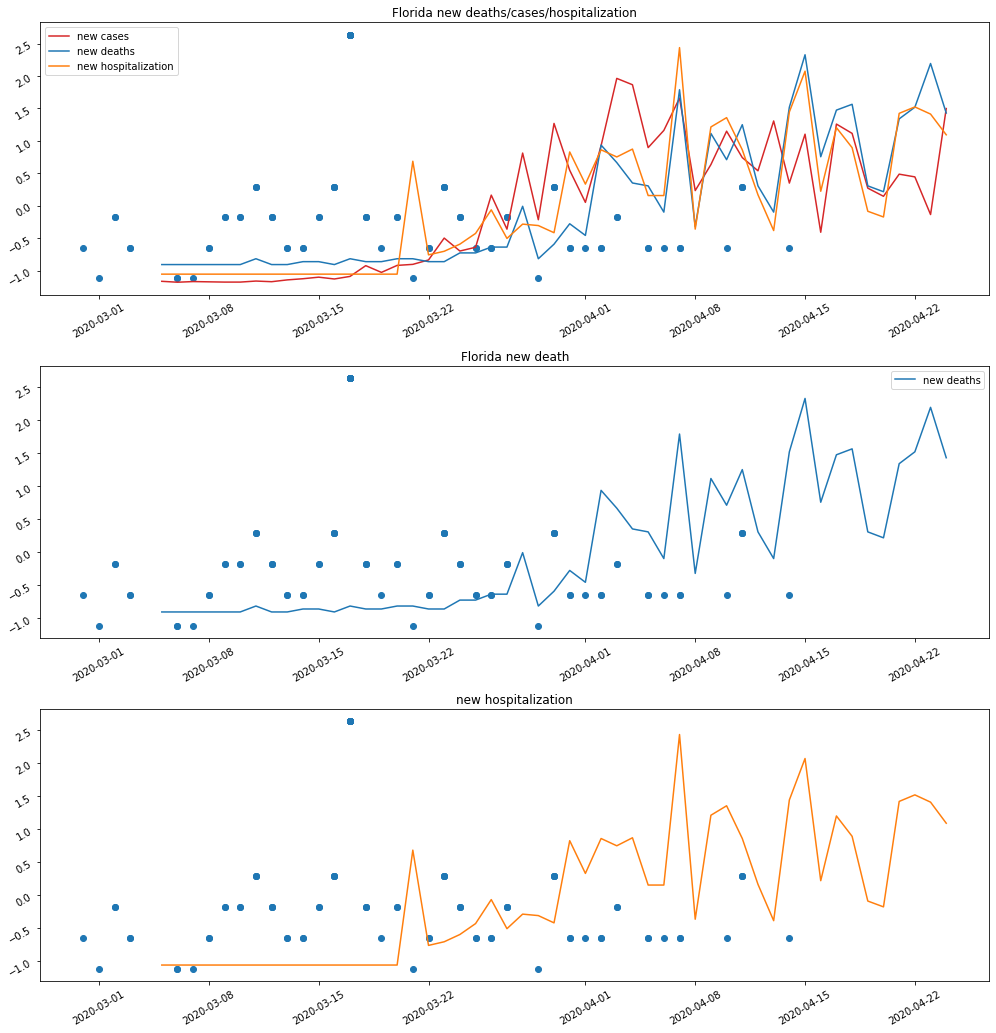

--------------------


In [118]:
mitigation_vs_cases_state_level('Florida')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

New York


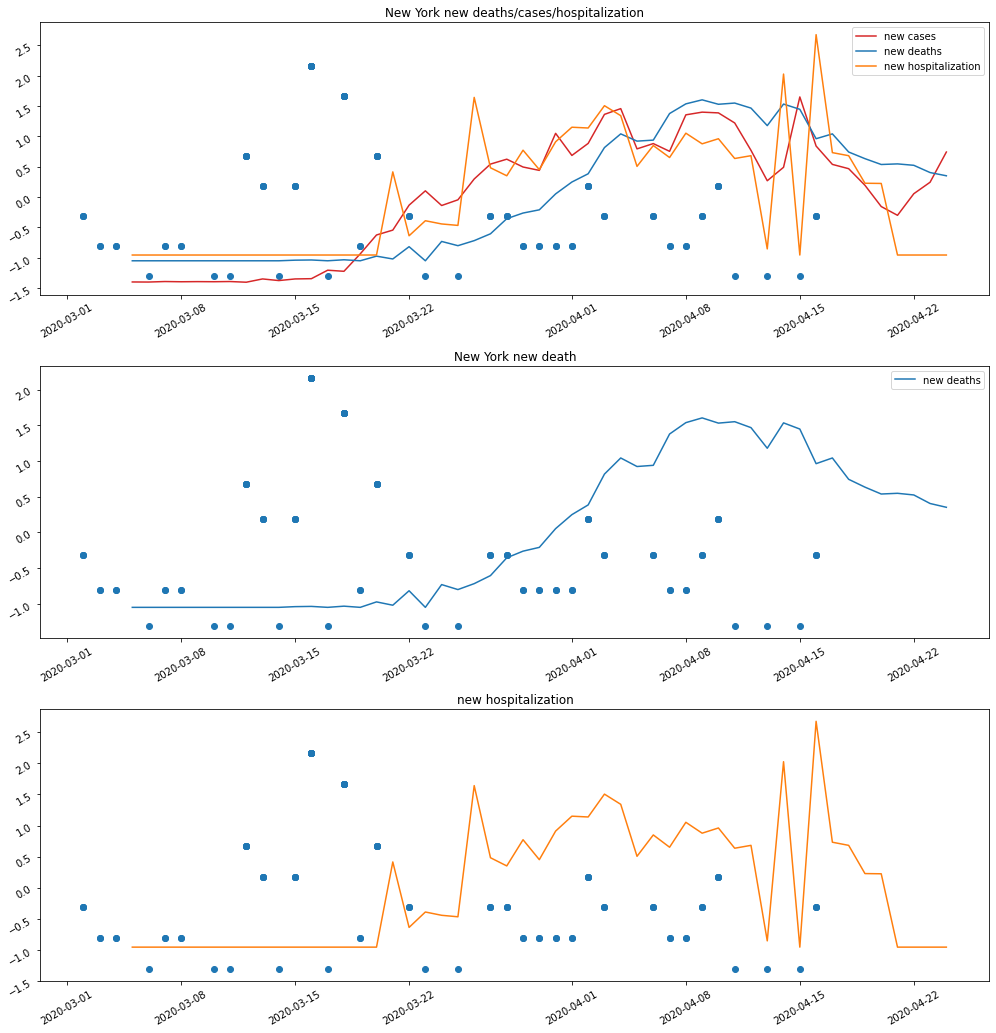

--------------------


In [119]:
mitigation_vs_cases_state_level('New York')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

Texas


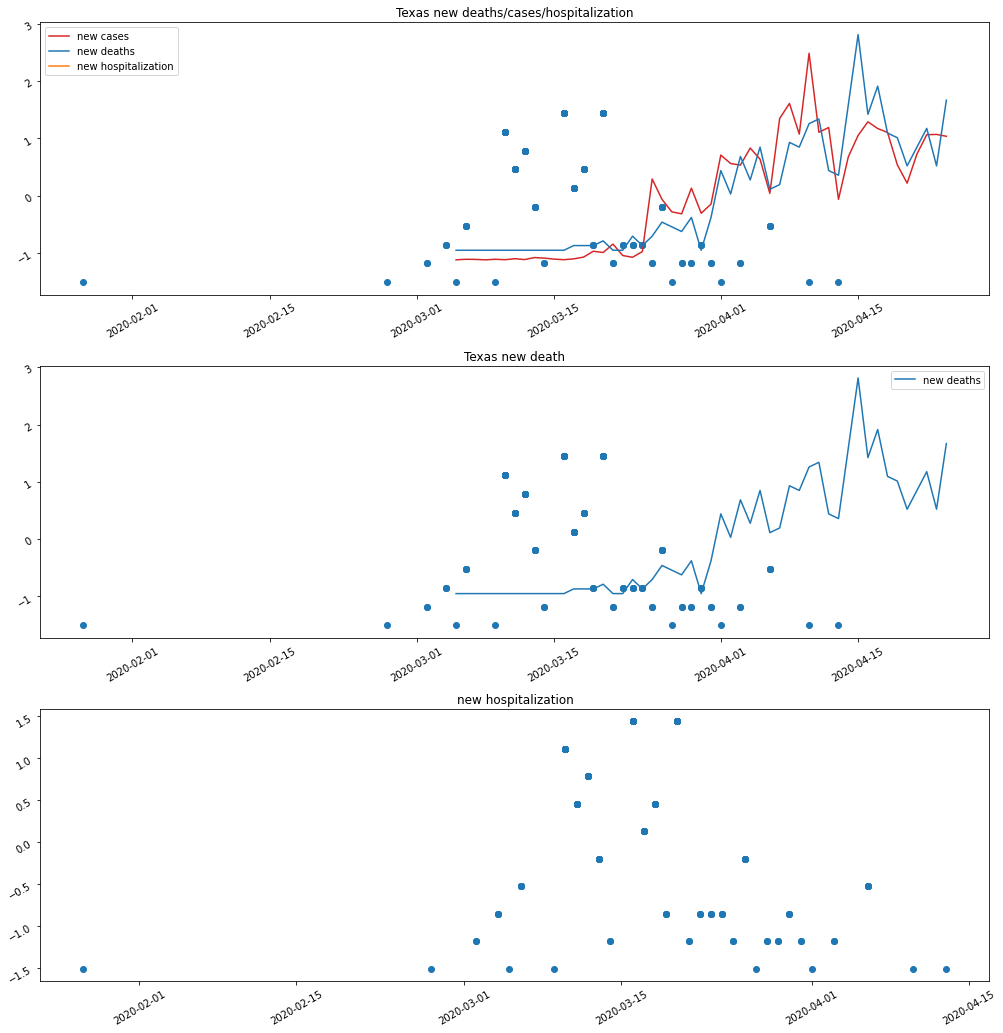

--------------------


In [120]:
mitigation_vs_cases_state_level('Texas')

**Let's explore the relationship between the mitigation type of new public services and the number of tests/number of positives/negatives**

This follows the assumption that most new public services are comprised of actions that are for increasing the medical system capacity or increasing testing. Since we assume that this would have led to an increase in testing, then we would see a surge in the number of positives or negatives. 

In [121]:
central_data.loc[central_data['State'] == 'Deleware', 'State'] = 'Delaware'
central_data.loc[central_data['State'] == 'illinois', 'State'] = 'Illinois'
central_data.loc[central_data['State'] == 'Louisiana ', 'State'] = 'Louisiana'

# count the number of new public services instance by each state
state_new_public_services = central_data[central_data['Mitigation type'] == 'new public services'].groupby('State').count()
state_new_public_services.head(10)

County  Date  Raw Description  ...  Note  UserID  Source
State                                       ...                      
Alabama           0     2                2  ...     0       2       2
Alaska            0     1                1  ...     1       1       1
Arizona           2    14               14  ...     3      14      14
Arkansas          0     1                1  ...     0       1       1
California        4    12               12  ...     0      12      12
Connecticut       4    28               28  ...    12      28      27
Delaware          0     8                8  ...     0       8       8
Florida           4    13               13  ...     0      13      13
Georgia           1     2                2  ...     0       2       2
Idaho             0     4                4  ...     2       4       4

[10 rows x 8 columns]

In [122]:
# state with its population
state_pop_df = pd.DataFrame(county_pop.groupby('State')['population'].sum())
state_pop_df.head()

population
State            
AK         731545
AL        4903185
AR        3017804
AZ        7278717
CA       39512223

In [123]:
# finding the number of tests by state
state_new_public_services['totalTestResults'] = pd.Series()
state_new_public_services['negative'] = pd.Series()
state_new_public_services['positive'] = pd.Series()
state_new_public_services['death'] = pd.Series()
state_new_public_services['case'] = pd.Series()

# columns to explore are totalTestResults, positive, negative
latest_test_data = daily[daily['date'] == '2020-04-24']

for state in list(state_new_public_services.index):
  # this is to keep out values such as USA
  if state in us_state_abbrev.keys():
    state_abv = us_state_abbrev[state]
    totalTestResultState = latest_test_data[latest_test_data['state'] == state_abv]['totalTestResults'].values[0]
    negativeState = latest_test_data[latest_test_data['state'] == state_abv]['negative'].values[0]
    positiveState = latest_test_data[latest_test_data['state'] == state_abv]['positive'].values[0]
    deathState = latest_test_data[latest_test_data['state'] == state_abv]['death'].values[0]
    caseState = latest_test_data[latest_test_data['state'] == state_abv]['total'].values[0]

    # controlling for state population so its totalTestResults, negative, positive per person in a state
    state_pop = state_pop_df[state_pop_df.index == state_abv]['population'].values[0]

    state_new_public_services.loc[state_new_public_services.index == state, 'totalTestResults'] = totalTestResultState / state_pop
    state_new_public_services.loc[state_new_public_services.index == state, 'negative'] = negativeState / state_pop
    state_new_public_services.loc[state_new_public_services.index == state, 'positive'] = positiveState / state_pop
    state_new_public_services.loc[state_new_public_services.index == state, 'death'] = deathState / state_pop
    state_new_public_services.loc[state_new_public_services.index == state, 'total'] = caseState / state_pop
    state_new_public_services.loc[state_new_public_services.index == state, 'Mitigation type'] /= state_pop

state_new_public_services.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future versio

County  Date  Raw Description  ...     death  case     total
State                                      ...                          
Alabama          0     2                2  ...  0.000040   NaN  0.010747
Alaska           0     1                1  ...  0.000012   NaN  0.016788
Arizona          2    14               14  ...  0.000037   NaN  0.008341
Arkansas         0     1                1  ...  0.000015   NaN  0.011789
California       4    12               12  ...  0.000040   NaN  0.012507

[5 rows x 14 columns]

In [124]:
state_new_public_services = state_new_public_services.drop('USA',  axis=0)
print('Correlation Coefficient between number of new public services and total test results {}'.format(np.corrcoef(state_new_public_services['Mitigation type'], state_new_public_services['totalTestResults'])))

Correlation Coefficient between number of new public services and total test results [[1.         0.15924388]
 [0.15924388 1.        ]]


In [125]:
print('Correlation Coefficient between number of new public services and number of negatives {}'.format(np.corrcoef(state_new_public_services['Mitigation type'], state_new_public_services['negative'])))

Correlation Coefficient between number of new public services and number of negatives [[1.         0.19071991]
 [0.19071991 1.        ]]


In [126]:
print('Correlation Coefficient between number of new public services and number of positives {}'.format(np.corrcoef(state_new_public_services['Mitigation type'], state_new_public_services['positive'])))

Correlation Coefficient between number of new public services and number of positives [[1.         0.01583392]
 [0.01583392 1.        ]]


In [127]:
print('Correlation Coefficient between number of new public services and number of death {}'.format(np.corrcoef(state_new_public_services['Mitigation type'], state_new_public_services['death'])))

Correlation Coefficient between number of new public services and number of death [[1.         0.02267068]
 [0.02267068 1.        ]]


There is a weak positive correlation coefficient between the number of new public services in a state and the number of test results. 

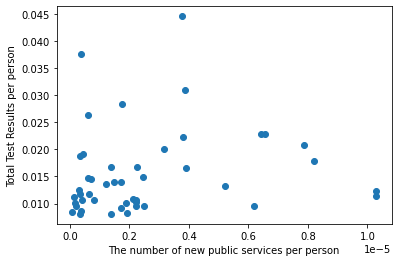

In [128]:
plt.scatter(state_new_public_services['Mitigation type'], state_new_public_services['totalTestResults'])
plt.xlabel('The number of new public services per person')
plt.ylabel('Total Test Results per person')
plt.show()

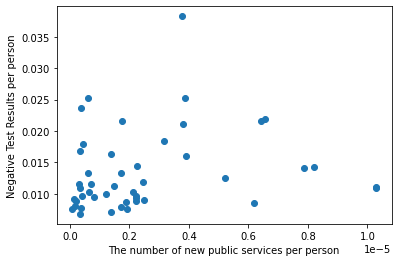

In [129]:
plt.scatter(state_new_public_services['Mitigation type'], state_new_public_services['negative'])
plt.xlabel('The number of new public services per person')
plt.ylabel('Negative Test Results per person')
plt.show()

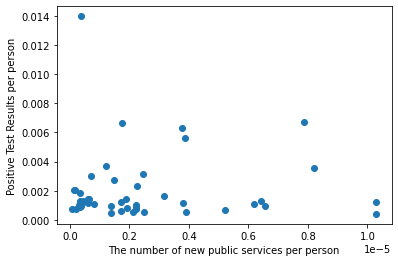

In [130]:
plt.scatter(state_new_public_services['Mitigation type'], state_new_public_services['positive'])
plt.xlabel('The number of new public services per person')
plt.ylabel('Positive Test Results per person')
plt.show()

In [131]:
# count the number of mitigation measures by state
state_mitigation_measures_count = central_data.groupby('State').count()
state_mitigation_measures_count.drop('USA', axis=0)

for state in list(state_mitigation_measures_count.index):
  if state not in list(state_new_public_services.index):
    state_mitigation_measures_count.drop(state, axis=0, inplace=True)
  else:
    state_abv = us_state_abbrev[state]
    state_pop = state_pop_df[state_pop_df.index == state_abv]['population'].values[0]
    state_mitigation_measures_count.loc[state_mitigation_measures_count.index == state,'Mitigation type'] /= state_pop
state_mitigation_measures_count['Mitigation type']
print('Correlation Coefficient between number of mitigation measures and total test results {}'.format(np.corrcoef(state_mitigation_measures_count['Mitigation type'], state_new_public_services['totalTestResults'])))

Correlation Coefficient between number of mitigation measures and total test results [[1.         0.19540547]
 [0.19540547 1.        ]]


In [132]:
print('Correlation Coefficient between number of mitigation measures and positives {}'.format(np.corrcoef(state_mitigation_measures_count['Mitigation type'], state_new_public_services['positive'])))

Correlation Coefficient between number of mitigation measures and positives [[ 1.         -0.03732493]
 [-0.03732493  1.        ]]


In [133]:
print('Correlation Coefficient between number of mitigation measures and negatives {}'.format(np.corrcoef(state_mitigation_measures_count['Mitigation type'], state_new_public_services['negative'])))

Correlation Coefficient between number of mitigation measures and negatives [[1.         0.25547146]
 [0.25547146 1.        ]]


In [134]:
print('Correlation Coefficient between number of mitigation measures and total deaths {}'.format(np.corrcoef(state_mitigation_measures_count['Mitigation type'], state_new_public_services['death'])))

Correlation Coefficient between number of mitigation measures and total deaths [[ 1.         -0.10291714]
 [-0.10291714  1.        ]]


In [135]:
print('Correlation Coefficient between number of mitigation measures and total cases {}'.format(np.corrcoef(state_mitigation_measures_count['Mitigation type'], state_new_public_services['total'])))

Correlation Coefficient between number of mitigation measures and total cases [[1.        0.1958033]
 [0.1958033 1.       ]]
